In [1]:
import warnings 
warnings.filterwarnings('ignore')

#basic libraries

import numpy as np
import pandas as pd

#visualization libraries

import missingno as msno
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

*1. Loading the data*

*2. Checking the head of the data*

*3. Looking out for the null values*

In [4]:
data=pd.read_csv('G:/survey (1).csv')
data

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,8/27/2014 11:29,37,Female,United States,IL,NaN,No,Yes,Often,25-Jun,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,8/27/2014 11:29,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,8/27/2014 11:29,32,Male,Canada,NaN,NaN,No,No,Rarely,25-Jun,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,8/27/2014 11:29,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,8/27/2014 11:30,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,9/12/2015 11:17,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,9/26/2015 1:07,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,11/7/2015 12:36,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,11/30/2015 21:25,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [3]:
data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


<h3 style = "font-family: Comic Sans MS;background-color:#D7BDE2	"> Understanding the Columns: </h3>

* **Timestamp**
* **Age**
* **Gender**
* **Country**
* **state:** If you live in the United States, which state or territory do you live in?
* **self_employed:** Are you self-employed?
* **family_history:** Do you have a family history of mental illness?
* **treatment:** Have you sought treatment for a mental health condition?
* **work_interfere:** If you have a mental health condition, do you feel that it interferes with your work?
* **no_employees:** How many employees does your company or organization have?
* **remote_work:** Do you work remotely (outside of an office) at least 50% of the time?
* **tech_company:** Is your employer primarily a tech company/organization?
* **benefits:** Does your employer provide mental health benefits?
* **care_options:** Do you know the options for mental health care your employer provides?
* **wellness_program:** Has your employer ever discussed mental health as part of an employee wellness program?
* **seek_help:** Does your employer provide resources to learn more about mental health issues and how to seek help?
* **anonymity:** Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?
* **leave:** How easy is it for you to take medical leave for a mental health condition?
* **mentalhealthconsequence:** Do you think that discussing a mental health issue with your employer would have negative consequences?
* **physhealthconsequence:** Do you think that discussing a physical health issue with your employer would have negative consequences?
* **coworkers:** Would you be willing to discuss a mental health issue with your coworkers?
* **physhealthinterview:** Would you bring up a physical health issue with a potential employer in an interview?
* **mentalvsphysical:** Do you feel that your employer takes mental health as seriously as physical health?
* **obs_consequence:** Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?
* **comments:** Any additional notes or comments


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

<h3 style = "font-family: Comic Sans MS;background-color:#D7BDE2	"> Important Inferences: </h3>

* There are a total of **26** columns in the dataset.
* We see that except the age column, all the columns are of object datatype.
* Comment column seems to contain most number **( 70% )** of null values, which makes sense because it was an optional text box so it's reasonable to expect that many (most) respondents would leave it blank.
* We will be dropping the timestamp column because it's contains date, month, year and time the respondent took this questionnaire, which is irrelevant for us.
* The state column also contains a lot of null values. We'll dig deeper into that.


<h1 style = "font-family: Comic Sans MS;background-color:#D7BDE2	"> Data Preparation & Performing Feature Engineering </h1>


In [7]:
print("The dataset contains different age groups including: \n")
print(data['Age'].unique())
print("\n \n")
print("The different gender notations used in our dataset are: \n")
print(data['Gender'].unique())

The dataset contains different age groups including: 

[         37          44          32          31          33          35
          39          42          23          29          36          27
          46          41          34          30          40          38
          50          24          18          28          26          22
          19          25          45          21         -29          43
          56          60          54         329          55 99999999999
          48          20          57          58          47          62
          51          65          49       -1726           5          53
          61           8          11          -1          72]

 

The different gender notations used in our dataset are: 

['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fl

<h3 style = "font-family: Comic Sans MS;background-color:#D7BDE2	"> Important Inferences: </h3>

Ofcourse you and I are thinking the  same thing. 

* How can age be negative? And age **below 15 years**? Are they even legally allowed to work?
* Regarding the gender, people have described themselves as male and females in such different ways!
    
    **On a lighter note, this is what happens when you don't take survey questions like this in the form of checkboxes! 😁😁**
    
Lets get back to our work and correct these responses. While this may not be the best way, we will be using this approach for gender column:
We will be renaming and combining all the categories that mean the same into one.

* Male, or cis Male, means born as male and decide to be male.
* Female, or cis Female, means born as female and decide to be female.
* Other, is a word that describes sexual and gender identities other than straight and cisgender. Lesbian, gay, bisexual, and transgender people may all identify with the word other.


In [8]:
data.drop(data[data['Age'] < 0].index, inplace = True) 
data.drop(data[data['Age'] > 100].index, inplace = True)
data['Age'].unique()

array([37, 44, 32, 31, 33, 35, 39, 42, 23, 29, 36, 27, 46, 41, 34, 30, 40,
       38, 50, 24, 18, 28, 26, 22, 19, 25, 45, 21, 43, 56, 60, 54, 55, 48,
       20, 57, 58, 47, 62, 51, 65, 49,  5, 53, 61,  8, 11, 72])

In [9]:
data['Gender'].replace(['Male ', 'male', 'M', 'm', 'Male', 'Cis Male',
                     'Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)',
                      'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make',], 'Male', inplace = True)

data['Gender'].replace(['Female ', 'female', 'F', 'f', 'Woman', 'Female',
                     'femail', 'Cis Female', 'cis-female/femme', 'Femake', 'Female (cis)',
                     'woman',], 'Female', inplace = True)

data["Gender"].replace(['Female (trans)', 'queer/she/they', 'non-binary',
                     'fluid', 'queer', 'Androgyne', 'Trans-female', 'male leaning androgynous',
                      'Agender', 'A little about you', 'Nah', 'All',
                      'ostensibly male, unsure what that really means',
                      'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?',
                      'Guy (-ish) ^_^', 'Trans woman',], 'Other', inplace = True)

data['Gender'].value_counts()

Male      988
Female    247
Other      19
Name: Gender, dtype: int64

<h3 style = "font-family: Comic Sans MS;background-color:#D7BDE2	"> To be Noted: </h3>

Unknowingly, we have stumbled upon the fact that the number of males in the dataset are 4 times the number of females. Thus, we must keep this in mind and avoid making any faulty assumptions that males are more susceptible to mental health issues etc. 

Alternatively, we may conclude that the number of males in the tech industry are much more as compared to the number of females (This research was conducted specifically for the tech industry.).


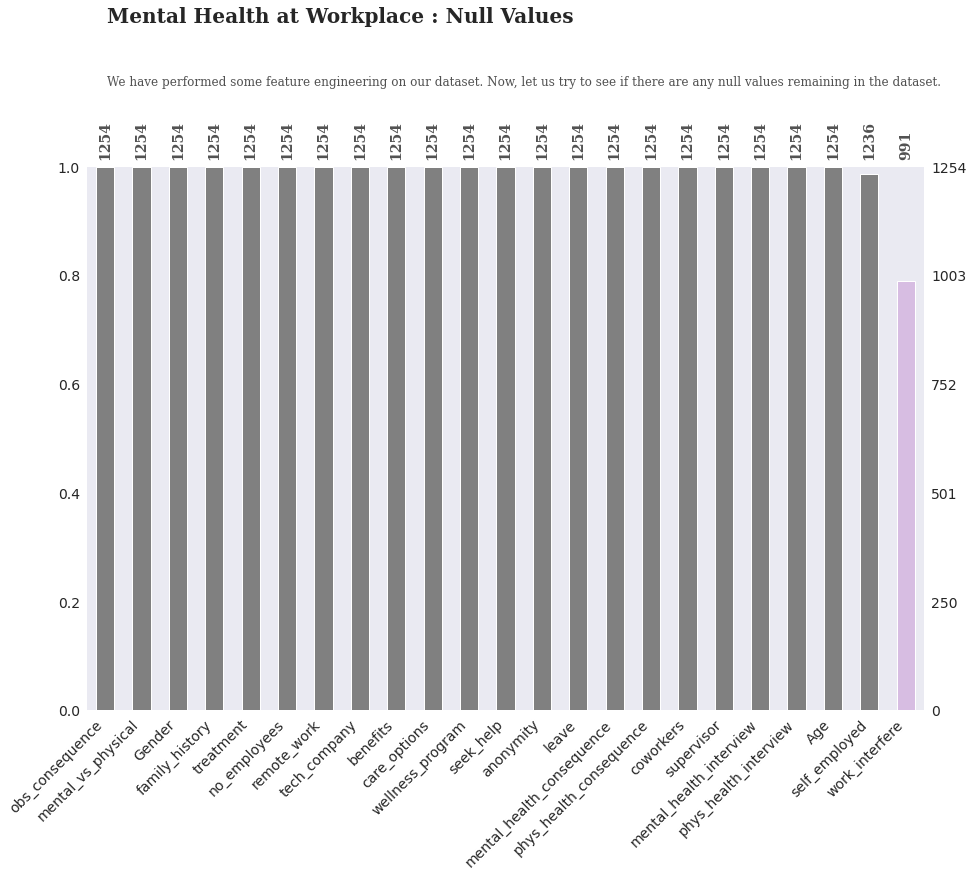

In [10]:
sns.set_style('dark')
color = ['grey','grey','grey','grey','grey','grey','grey','grey','grey','grey','grey','grey', 'grey','grey','grey','grey','grey','grey', 'grey','grey','grey','grey','#D7BDE2']
msno.bar(data,fontsize =14, color = color, sort = 'descending', figsize = (15,10))

plt.text(0.05,1.265,'Mental Health at Workplace : Null Values', {'font':'serif', 'size':20, 'weight':'bold'})
plt.text(0.05,1.15,'''We have performed some feature engineering on our dataset. Now, let us try to see if there are any null values remaining in the dataset.''', {'font':'serif', 'size':12, 'weight':'normal'}, alpha = 0.8)
plt.xticks( rotation = 90, 
                   **{'font':'serif','size':14,'weight':'bold','horizontalalignment': 'center'},alpha = 0.8)

plt.show()


* There's only one column which is **'work_interfere'** remaining that contains null values. For now we will proceed without any imputation. 
* Actually, there's another column, **'self_employed'** which contains around 18 null values which we failed to notice at first.

> Now let us move forward and perform EDA

<h1 style = "font-family: Comic Sans MS;background-color:#D7BDE2	"> Exploratory Data Analysis </h1>



![Alt_Text](https://miro.medium.com/max/615/1*Nr8BJzXWodgpDZl-54abrQ.jpeg)

Before begining with the EDA which should learn about the organization which has collected this data.

**Open Sourcing Mental Illness** is a non-profit, corporation dedicated to raising awareness, educating, and providing resources to support mental wellness in the tech and open source communities. OSMI began in 2013, with Ed Finkler speaking at tech conferences about his personal experiences as a web developer and open source advocate with a mental health disorder. The response was overwhelming, and thus OSMI was born.

* Every year, **OSMI** came out with a new survey to see how employees want to get mental health treatment in tech companies around the world and I pick the survey from 2014.
* This survey is filled by respondents who suffer from mental health disorders (diagnose or un-diagnosed by medical, even it's just a feeling) in tech companies and see if any factors can affect the employee to get treatment or not.
* From this research, this machine learning can help HR to see what factors have the company needs to support so the employee wants to get mental health treatment.

> Let us begin by understanding the target data!

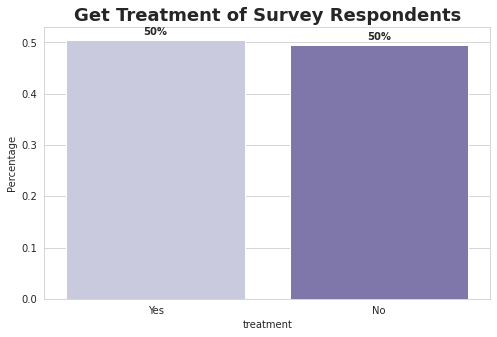

In [11]:
sns.set_style("whitegrid")
plt.figure(figsize = (8,5))
plt.title('Get Treatment of Survey Respondents', fontsize=18, fontweight='bold')
eda_percentage = data['treatment'].value_counts(normalize = True).rename_axis('treatment').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'treatment', y = 'Percentage', data = eda_percentage.head(10), palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

<h3 style = "font-family: Comic Sans MS;background-color:#D7BDE2	"> Inferences: </h3>


This is the respondents result of question, **'Have you sought treatment for a mental health condition?'**.


This is our target variable.
Looking at the first graph, we see that the percentage of respondents who want to get treatment is exactly 50%. Workplaces that promote mental health and support people with mental disorders are more likely to  have increased productivity, reduce absenteeism, and benefit from associated economic gains. If employees enjoy good mental health, employees can:

* Be more productive
* Take active participation in employee engagement activities and make better relations; both at workplace and personal life.
* Be more joyous and make people around them happy.


> After analysing the target variable, we will try to explore the individual columns and what they mean.

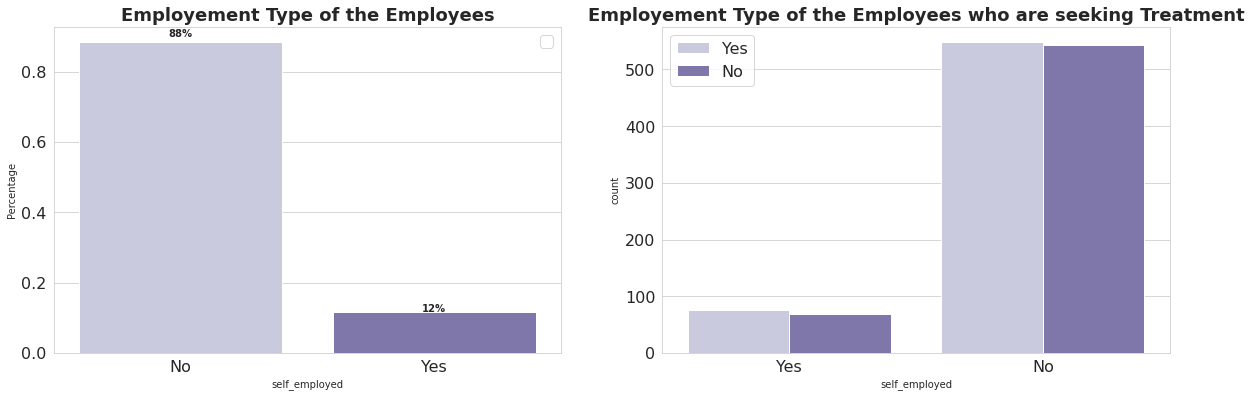

In [12]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
eda_percentage = data['self_employed'].value_counts(normalize = True).rename_axis('self_employed').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'self_employed', y = 'Percentage', data = eda_percentage, palette = 'Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Employement Type of the Employees', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(data['self_employed'], hue = data['treatment'], palette = 'Purples')
plt.title('Employement Type of the Employees who are seeking Treatment',  fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.show()

This is respondent's answer to the question, '**Are you self-employed?**'.

We see that the number of people who are self employed are around 10%. Most of the people who responded to the survey belonged to working class. We also see that though there is a vast difference between people who are self employed or not, the number of people who seek treatment in both the categories is more or less similar. 

> Thus, we may conclude that whether a person is self employed or not, does not largely affect whether he may be seeking mental treatment or not. 

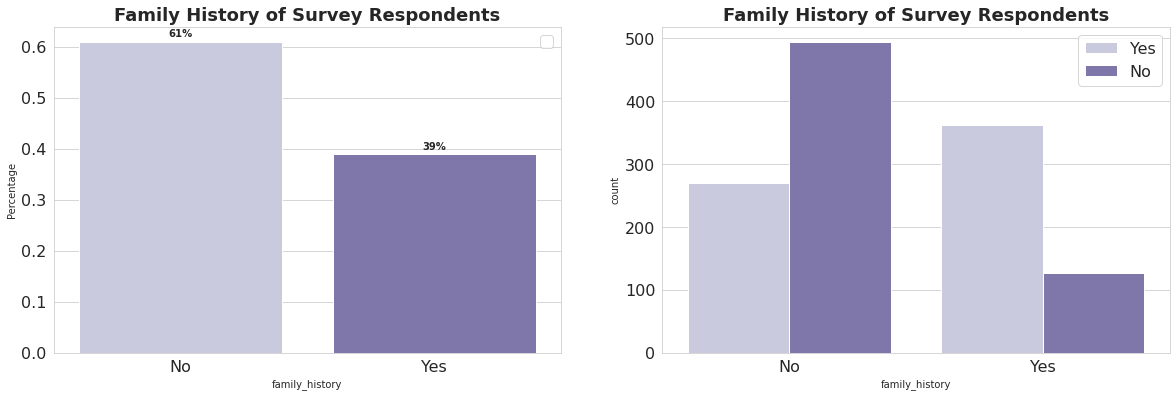

In [13]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
eda_percentage = data['family_history'].value_counts(normalize = True).rename_axis('family_history').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'family_history', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Family History of Survey Respondents', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(data['family_history'], hue = data['treatment'], palette='Purples')
plt.title('Family History of Survey Respondents', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

<h3 style = "font-family: Comic Sans MS;background-color:#D7BDE2	"> Inference: </h3>

This is the respondents answer to the question, **'Do you have a family history of mental illness?'**.

From close to 40% of the respondents who say that they have a family history of mental illness, the plot shows that they significantly want to get treatment rather than without a family history. This is acceptable, remember the fact that people with a family history pay more attention to mental illness. Family history is a significant risk factor for many mental health disorders. 

> Thus, this is an important factor that has to be taken under consideration as it influences the behaviour of the employees to a significant extent.



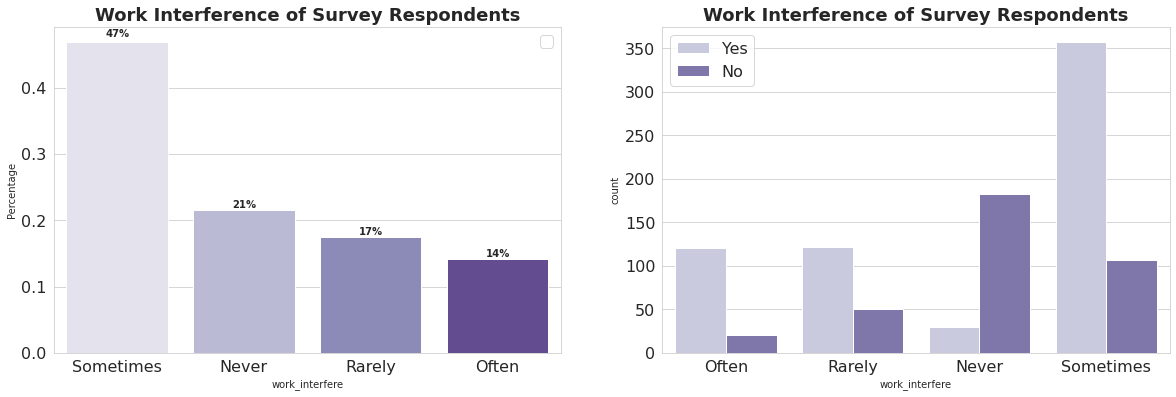

In [14]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
eda_percentage = data['work_interfere'].value_counts(normalize = True).rename_axis('work_interfere').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'work_interfere', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Work Interference of Survey Respondents', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(data['work_interfere'], hue = data['treatment'], palette = 'Purples')
plt.title('Work Interference of Survey Respondents', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)


<h3 style = "font-family: Comic Sans MS;background-color:#D7BDE2	"> Inference: </h3>


This was the respondent's answer to the question, **'If you have a mental health condition, do you feel that it interferes with your work?'.**

* On seeing the first graph we conclude that around 48% of people say that sometimes work interefers with their mental health. Now **'Sometimes'** is a really vague response to a question, and more often than not these are the people who actually face a condition but are too shy/reluctant to choose the extreme category.
* Coming to our second graph, we see that the people who chose **'Sometimes'** had the highest number of people who actually had a mental condition. Similar pattern was shown for the people who belonged to the **'Often category'*.
* But what is more surprising to know is that even for people whose mental health **'Never'** has interfered at work, there is a little group that still want to get treatment before it become a job stress. It can be triggered a variety of reasons like the requirements of the job do not match the capabilities, resources or needs of the worker.



> We will be leaving the 'number_of_employees' category and move forward with the next column which is 'remote_work'.


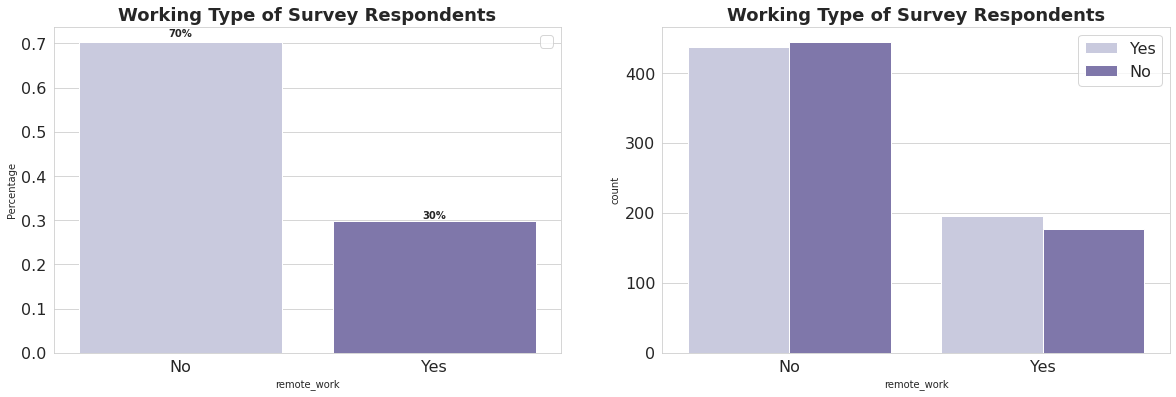

In [15]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
eda_percentage = data['remote_work'].value_counts(normalize = True).rename_axis('remote_work').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'remote_work', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Working Type of Survey Respondents', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(data['remote_work'], hue = data['treatment'], palette='Purples')
plt.title('Working Type of Survey Respondents', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

<h3 style = "font-family: Comic Sans MS;background-color:#D7BDE2	"> Inference: </h3>

This was the respondent's answer to the question, **'Do you work remotely (outside of an office) at least 50% of the time?'.**

Around 70% of respondents don't work remotely, which means the biggest factor of mental health disorder came up triggered on the workplace. On the other side, it has slightly different between an employee that want to get treatment and don't want to get a treatment. 
The number of people who seek treatment in both the categories is more or less similar and it does not affect our target variable. 

> Let's move forward with our next variable which is 'tech_company'.

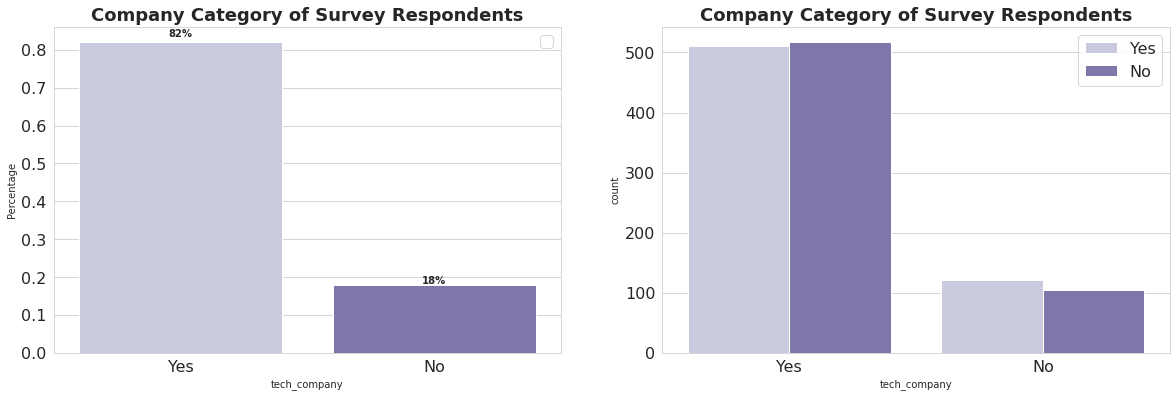

In [16]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
eda_percentage = data['tech_company'].value_counts(normalize = True).rename_axis('tech_company').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'tech_company', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Company Category of Survey Respondents', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(data['tech_company'], hue = data['treatment'], palette='Purples')
plt.title('Company Category of Survey Respondents', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)


This is the respondents answer to the question, **'Is your employer primarily a tech company/organization?'.**

* Although the survey was specifically designed to be conducted in the tech field, there are close to 18% of the companies belonginf to the non tech field. However, looking at the second graph, one may conclude that whether a person belongs to the tech field or not, mental health still becomes a big problem.

* However, on a deeper look we find that the number of employees in the tech sector who want to get treatment is slightly lower than the one's who don't. But in the non-tech field the situation gets reversed.

> The next category that we'll be looking into is **benefits**!

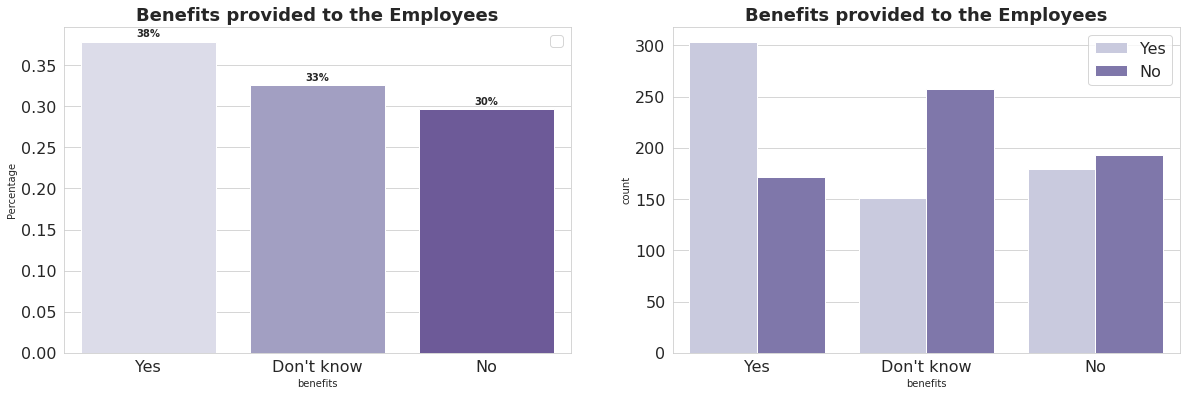

In [17]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
eda_percentage = data['benefits'].value_counts(normalize = True).rename_axis('benefits').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'benefits', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Benefits provided to the Employees', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(data['benefits'], hue = data['treatment'], palette='Purples')
plt.title('Benefits provided to the Employees', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

<h3 style = "font-family: Comic Sans MS;background-color:#D7BDE2	"> Inference: </h3>

This was the respondent's answer to the question, **'Does your employer provide mental health benefits?'.**

* We see that around 38% of the respondents said that their employer provided them mental health benefits, whereas a significant number ( 32% ) of them didn't even know whether they were provided this benefit.
* Coming to the second graph, we see that for the people who **YES** said to mental health benefits, around 63% of them said that they were seeking medical help. 
* Surprisingly, the people who said **NO** for the mental health benefits provided by the company, close to 45% of them who want to seek mental health treatment.   

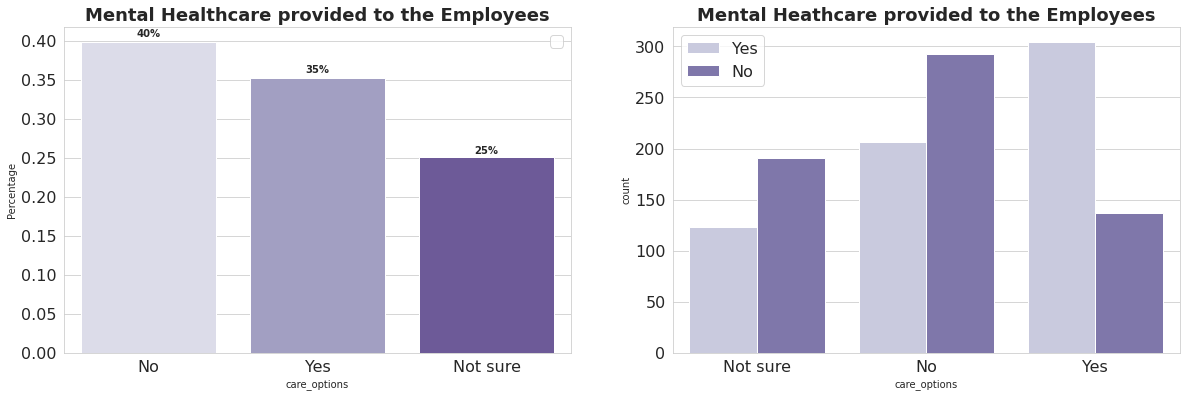

In [18]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = data['care_options'].value_counts(normalize = True).rename_axis('care_options').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'care_options', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Mental Healthcare provided to the Employees', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(data['care_options'], hue = data['treatment'], palette='Purples')
plt.title('Mental Heathcare provided to the Employees', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

This was the respondent's answer to the question, **'Do you know the options for mental health care your employer provides?'.**

Since this graph is more or less similar to the benefits one, we won't be discussing it in more detail. 

> Moving forward, the next category is wellness program. Lets try understanding that! 


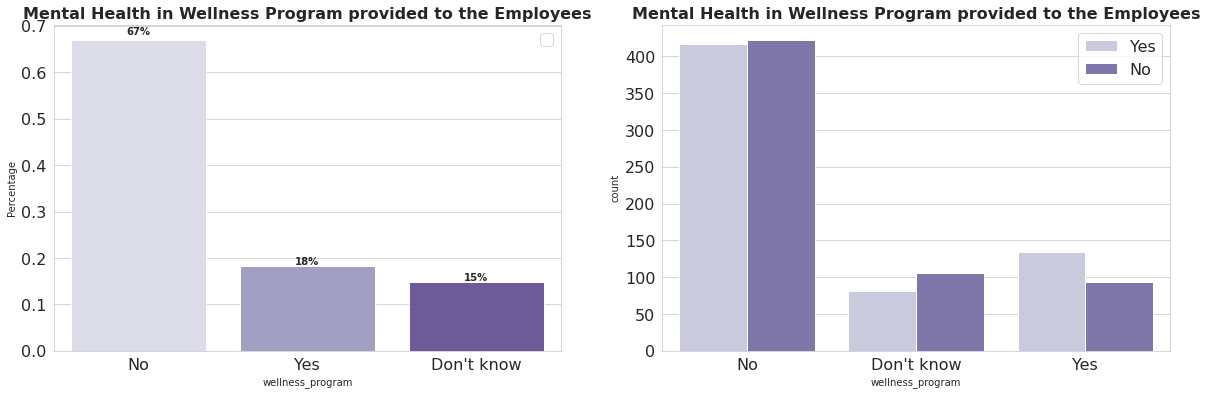

In [19]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = data['wellness_program'].value_counts(normalize = True).rename_axis('wellness_program').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'wellness_program', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Mental Health in Wellness Program provided to the Employees', fontsize=16, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(data['wellness_program'], hue = data['treatment'], palette='Purples')
plt.title('Mental Health in Wellness Program provided to the Employees', fontsize=16, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

<h3 style = "font-family: Comic Sans MS;background-color:#D7BDE2	"> Inference: </h3>

This is the respondents answer to the question, **'Has your employer ever discussed mental health as part of an employee wellness program?'.**

* About 19% of the repondents say **YES** about becoming a part of the employee wellness program and out of those 60% of employee want to get treatment. 
* One shocking revealation is that more than 65% of respondents say that there aren't any wellness programs provided by their company. But close to half of those respondents want to get treatment, which means the company needs to fulfil its duty and provide it soon. 
 
> The next category is **seek_help**, we will be leaving it as it is more or less similar to care_options, benefits and wellness_program. Our next category is anonymity.

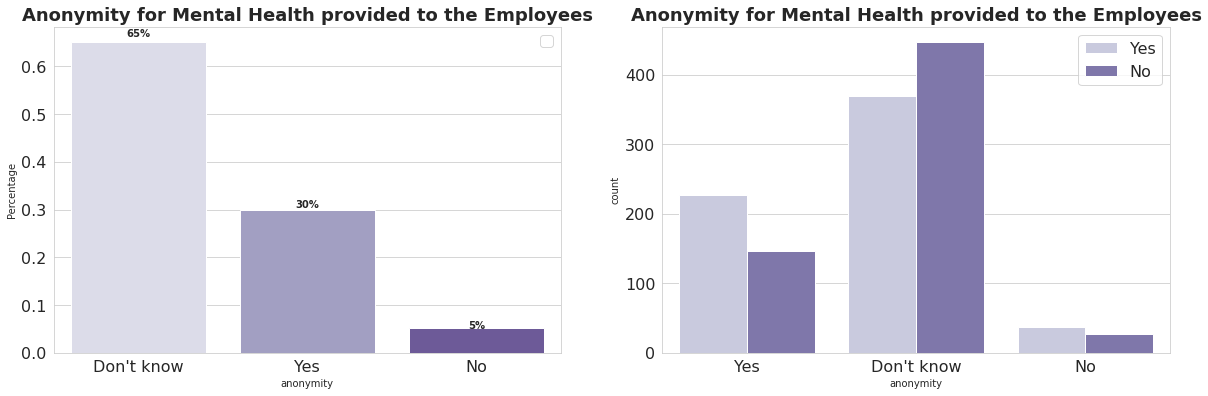

In [20]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = data['anonymity'].value_counts(normalize = True).rename_axis('anonymity').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'anonymity', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Anonymity for Mental Health provided to the Employees', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(data['anonymity'], hue = data['treatment'], palette='Purples')
plt.title('Anonymity for Mental Health provided to the Employees', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

<h3 style = "font-family: Comic Sans MS;background-color:#D7BDE2	"> Inference: </h3>

This is the respondent's answer to the question, '**Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?**'.

* Around 65% of the people were not aware whether anonymity was provided to them and 30% said yes to the provision of anonymity by the company.
* Looking at the second graph, we see that out of the people who answered yes to the provision of anonymity, around 60% of them were seeking help regarding their mental condition. Possible reasoning for this may be that the employee feels that the company has protected his/her privacy and can be trusted with knowing the mental health condition of it's workers. The most basic reason behind hiding this from the fellow workers can be the social stigma attached to mental health.

> The next factor that we will be discussing is '**leave.**'


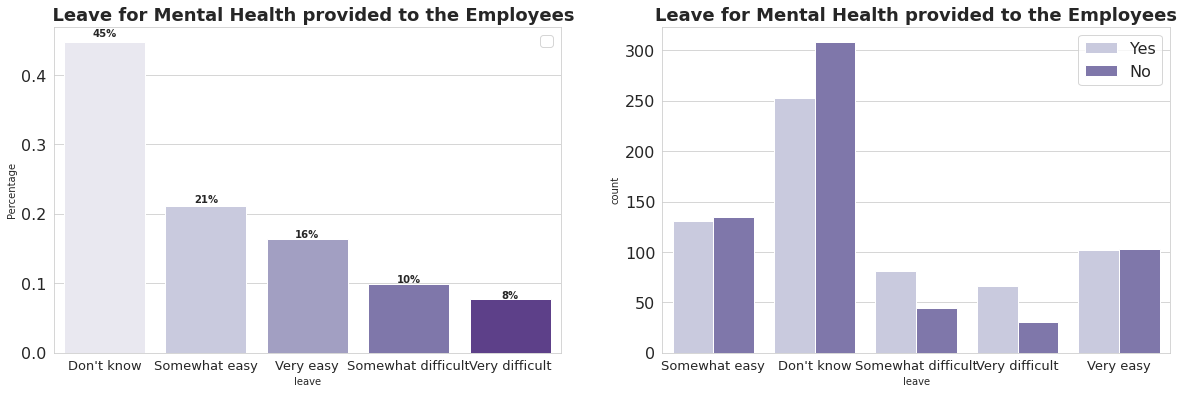

In [21]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = data['leave'].value_counts(normalize = True).rename_axis('leave').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'leave', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('  Leave for Mental Health provided to the Employees', fontsize=18, fontweight='bold')
plt.xticks(fontsize=13)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(data['leave'], hue = data['treatment'], palette='Purples')
plt.title('Leave for Mental Health provided to the Employees', fontsize=18, fontweight='bold')
plt.xticks(fontsize=13)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

This is the respondent's answer to the question, '**How easy is it for you to take medical leave for a mental health condition?**'

* While close to 50% of the people answered that they did not know about it, suprisingly around 45% of those people sought help for their condition.
* A small percent of people ( around 8% ) said that it was very difficult for them to get leave for mental health and out of those, 75% of them sought for help.
* Employees who said it was 'somewhat easy' or 'very easy' to get leave had almost 50% people seeking medical help.

> The next category that we'd be looking into is **mental health consequence.**




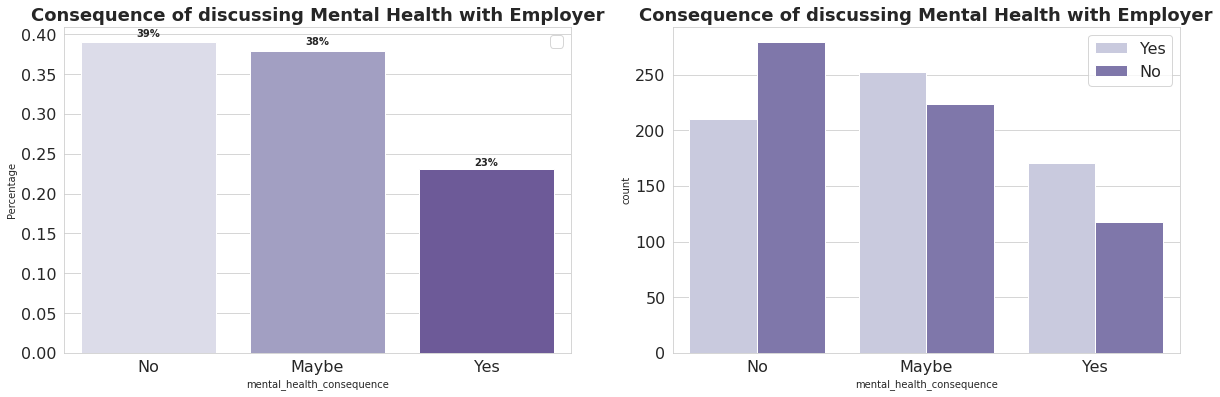

In [22]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = data['mental_health_consequence'].value_counts(normalize = True).rename_axis('mental_health_consequence').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'mental_health_consequence', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Consequence of discussing Mental Health with Employer', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(data['mental_health_consequence'], hue = data['treatment'], palette='Purples')
plt.title('Consequence of discussing Mental Health with Employer', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

<h3 style = "font-family: Comic Sans MS;background-color:#D7BDE2	"> Inference: </h3>

This is the respondent's answer to the question, '**Do you think that discussing a mental health issue with your employer would have negative consequences?**'.

* Around same number of people ( around 40% each ) answered **Maybe** as well as **No** for the negative impact of discussing mental health consequences with the employer and about 23% said **Yes** to it.
* 23% is a significant number who feel that discussing their mental health might create a negative impact on their employer. This may be because of the stigma, decreased productivity, impact on promotions or any other preconcieved notion.
* It is nice to know that out of the people who answered No, there were only around 40% of the people who actually sought after help, whereas in both the other categories, it is more than 50%.

> The next factor that we are going to discuss is **physical health consequence.** It will be interesting to compare both of these two together.

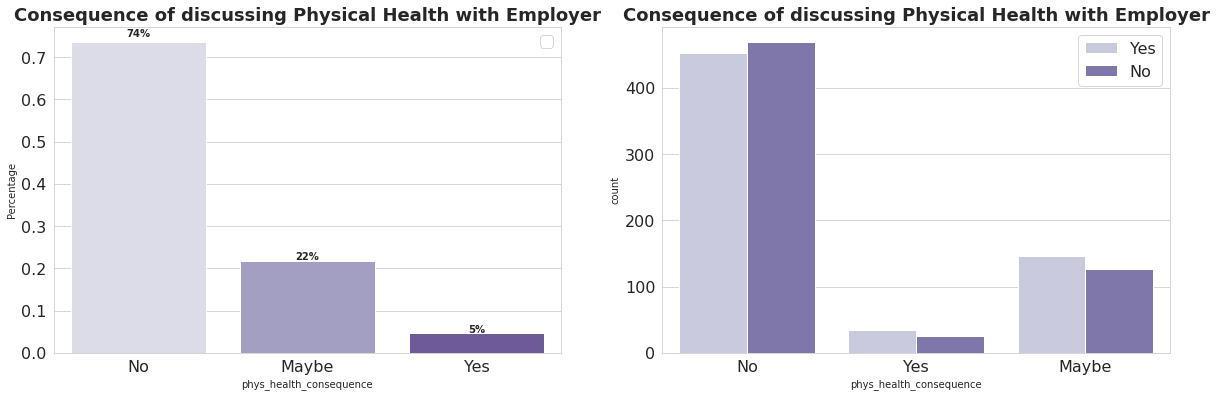

In [23]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = data['phys_health_consequence'].value_counts(normalize = True).rename_axis('phys_health_consequence').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'phys_health_consequence', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Consequence of discussing Physical Health with Employer', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(data['phys_health_consequence'], hue = data['treatment'], palette='Purples')
plt.title('Consequence of discussing Physical Health with Employer', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

<h3 style = "font-family: Comic Sans MS;background-color:#D7BDE2	"> Inference: </h3>

This is the respondent's answer to the question, '**Do you think that discussing a physical health issue with your employer would have negative consequences?**'

* There is a starking difference between the reponses for the same question regarding mental and physical health. More than 70% of the employees believe that their physical health does not create a negative impact on their employer and only 5% of them believes that it does. 
* While it maybe incorrect for us to draw any conclusions about whether they seek mental help on the basis of their physical condition, because it is more or less same for all the three categories, we must keep in mind about **how differently mental and physical health are treated as a whole.**

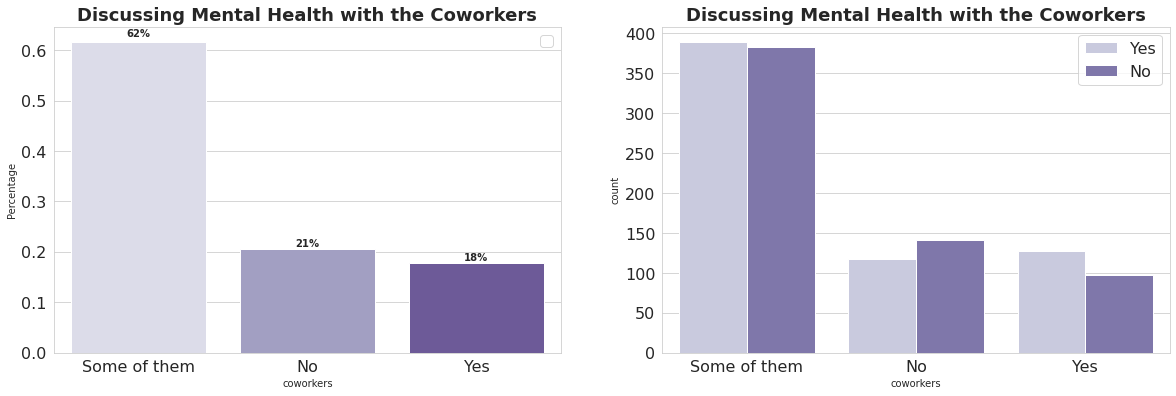

In [24]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = data['coworkers'].value_counts(normalize = True).rename_axis('coworkers').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'coworkers', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Discussing Mental Health with the Coworkers', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(data['coworkers'], hue = data['treatment'], palette='Purples')
plt.title('Discussing Mental Health with the Coworkers', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

This is the respondent's answer to the question, '**Would you be willing to discuss a mental health issue with your coworkers?**'

* Around 62% of the employees said that they might be comfortable discussing some type of mental problems with their coworkers, and out of them around 50% actually sought for medical help.
* 20% of the employees believed that discussing mental health with their coworkers wasn't a good option for them.

> The next category is **supervisor.** Lets find out whether the employees are comfortable sharing their mental health with their supervisor.

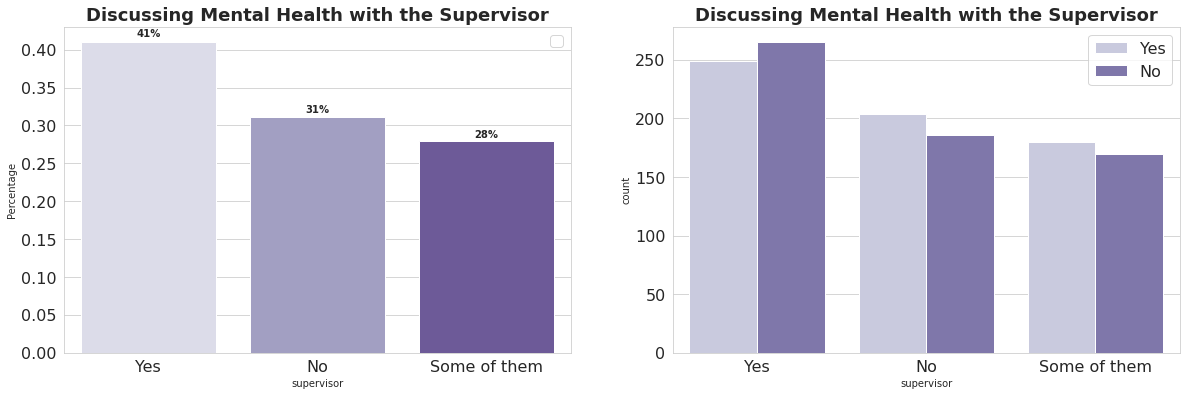

In [25]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = data['supervisor'].value_counts(normalize = True).rename_axis('supervisor').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'supervisor', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Discussing Mental Health with the Supervisor', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(data['supervisor'], hue = data['treatment'], palette='Purples')
plt.title('Discussing Mental Health with the Supervisor', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

<h3 style = "font-family: Comic Sans MS;background-color:#D7BDE2	"> Inference: </h3>

This is the respondent's answer to the question, **'Would you be willing to discuss a mental health issue with your direct supervisor(s)?'**.

* This graph is quite different from the one of the coworker. Here, around 40% of the workers believe in sharing their mental health with their supervisors. This may have something to do with their performance etc.
* Looking at the second graph, employees who actually sought for help regarding their mental health was more or less similar for all the three categories.

> This has become really tiring now! Anyway, just 2-3 categories more left for analysis. Let's move forward with our next  variable, which is **'mental_health_interview'** 

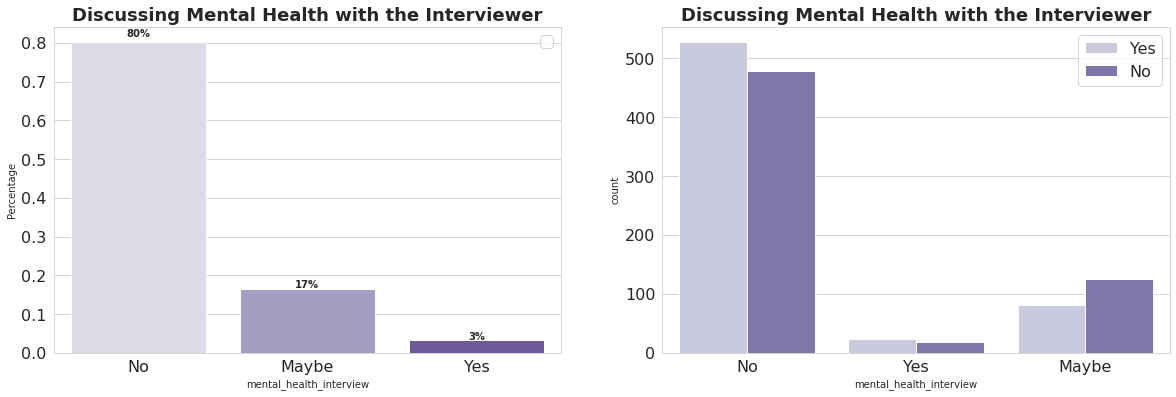

In [26]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = data['mental_health_interview'].value_counts(normalize = True).rename_axis('mental_health_interview').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'mental_health_interview', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Discussing Mental Health with the Interviewer', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(data['mental_health_interview'], hue = data['treatment'], palette='Purples')
plt.title('Discussing Mental Health with the Interviewer', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

This is the respondent's answer to the question, '**Do you think that discussing a mental health issue with your employer would have negative consequences?**'.

* As our intution might suggest us, 80% of the respondents believe that it is a good option to discuss your mental health with the future employer. This is actually a good thing! This might not have been the case 15 years ago.
* While around 15% of the candidates seem confused about whether they should be discussing their mental conditions with the future employer or not, less than 5% think that it may not be a good option discussing it.

> The next category is **physical_health_interview**. Let's see if there's any difference in the respondent's answer for this one with the previous one.

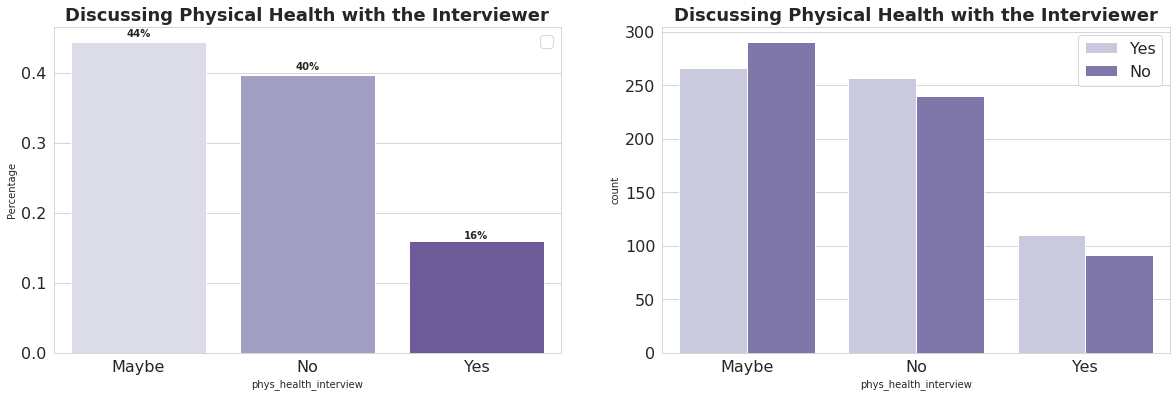

In [27]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = data['phys_health_interview'].value_counts(normalize = True).rename_axis('phys_health_interview').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'phys_health_interview', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Discussing Physical Health with the Interviewer', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(data['phys_health_interview'], hue = data['treatment'], palette='Purples')
plt.title('Discussing Physical Health with the Interviewer', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

<h3 style = "font-family: Comic Sans MS;background-color:#D7BDE2	"> Inference: </h3>

This is the respondent's answer to the question, **'Would you bring up a physical health issue with a potential employer in an interview?'**.

* While a majority of the people are still dubious about discussing their physical health condition with the future employer, however, close to 17% believe that there is no issue in discussing their physical health conditions.
* Around 50% of the people still remain confused about whether it is a good option to discuss their condition or not.

> Coming to the last but one, **mental_vs_physical**. Let's see what insights can be drawn from this category!

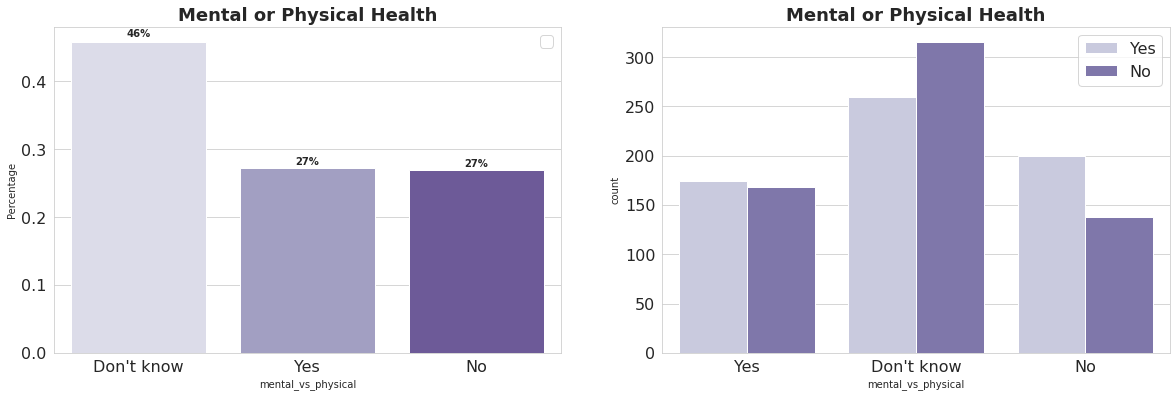

In [28]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = data['mental_vs_physical'].value_counts(normalize = True).rename_axis('mental_vs_physical').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'mental_vs_physical', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Mental or Physical Health', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(data['mental_vs_physical'], hue = data['treatment'], palette='Purples')
plt.title('Mental or Physical Health', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

# This was the respondent's answer to the question, 'Do you feel that your employer takes mental health as seriously as physical health?'

While close to 50% people said that they didn't know, the number of people who answered Yes as well as No were completely equal.
For the people who answered Yes as well as the ones who answered No, more than 505 of them sought after medical help for their mental health, whereas it was not the case for the one's belonging to the 'Don't know' category.
Coming to the last column, we have finally reached to obs_consequence. This definitely calls for a meme!

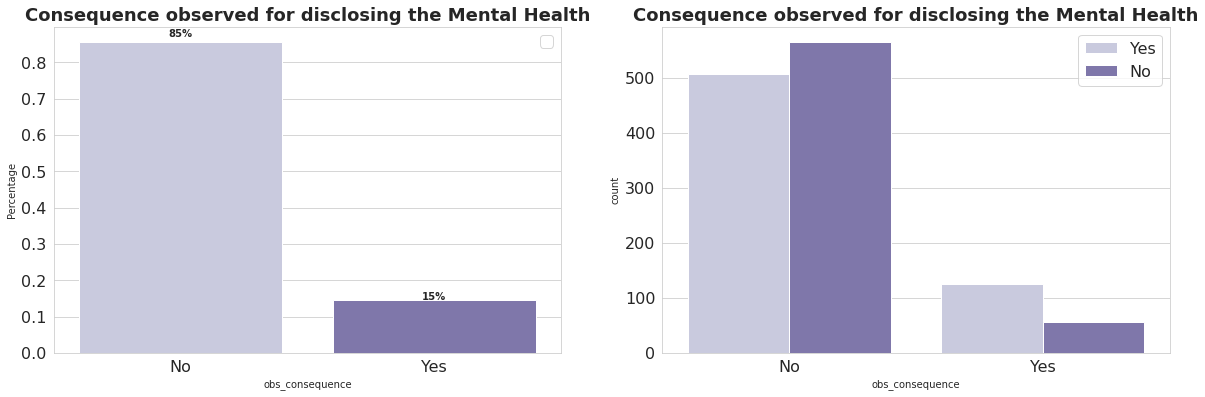

In [29]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = data['obs_consequence'].value_counts(normalize = True).rename_axis('obs_consequence').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'obs_consequence', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Consequence observed for disclosing the Mental Health', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(data['obs_consequence'], hue = data['treatment'], palette='Purples')
    
plt.title('Consequence observed for disclosing the Mental Health', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

<h3 style = "font-family: Comic Sans MS;background-color:#D7BDE2	"> Inference: </h3>

This was the respondent's answer to the question, **'Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?'**

* Majority ( 85% ) of the people, answered **No** to this question. This is quite important to note  that IT being an organised sector, follows strict guidelines of employee satisfaction etc. Thus, we didn't come across any major issue regarding the employer behavior as such!

> Anyway, I think we're done with the EDA. Let me know if we left something out and I will try top cover that as well!

In [26]:
data['Country'].replace(['United States','Canada','Mexico','Bahamas, The','Costa Rica'], 'North America', inplace = True)
data['Country'].replace(['United Kingdom','Bulgaria','France','Portugal' , 'Netherlands','Switzerland','Poland','Germany',
                        'Italy','Sweden','Latvia','Romania','Belgium','Spain','Finland','Bosnia and Herzegovina','Hungary',
                        'Croatia','Norway','Denmark','Greece','Moldova','Georgia','Czech Republic','Ireland','Slovenia',
                        'Austria'], 'Europe', inplace = True)
data['Country'].replace(['Zimbabwe', 'Nigeria'], 'Africa', inplace = True)
data['Country'].replace(['Russia','Israel','Singapore','Japan','Thailand','China','Philippines','India'], 'Asia', inplace = True)
data['Country'].replace(['Brazil','Colombia','Uruguay'], 'South America', inplace = True)

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Country', ylabel='count'>

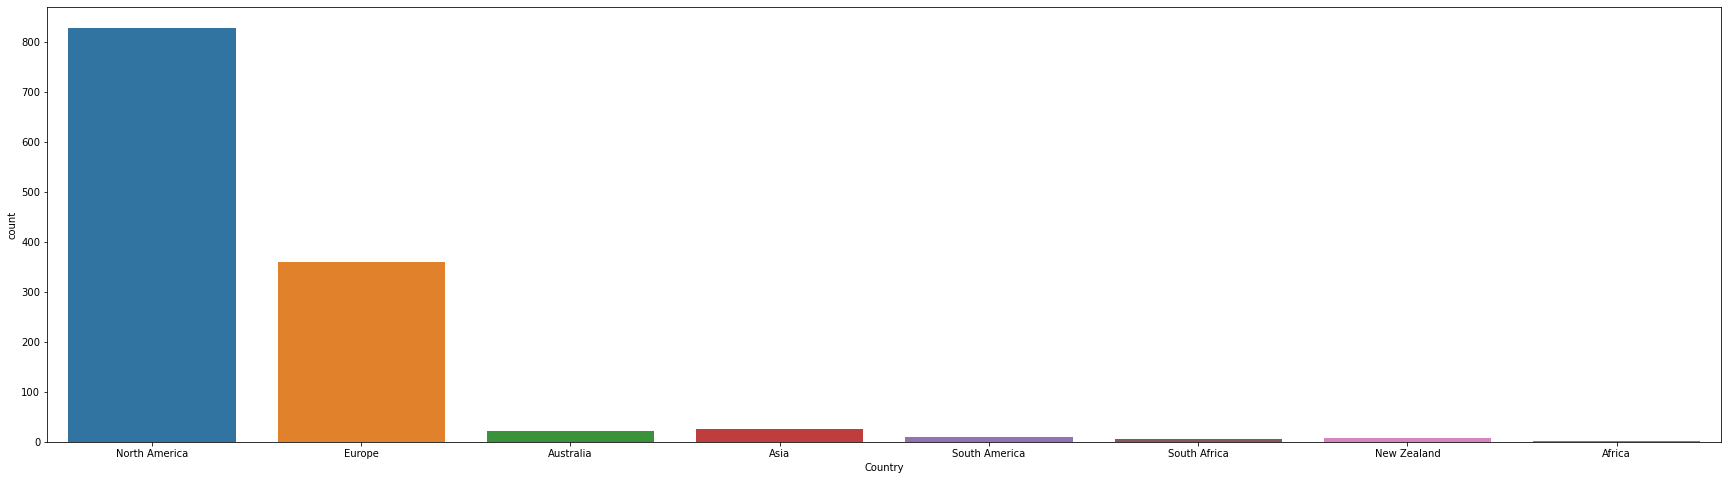

In [27]:
fig=plt.figure(figsize=[30,8])
sns.countplot(data['Country'])


# 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


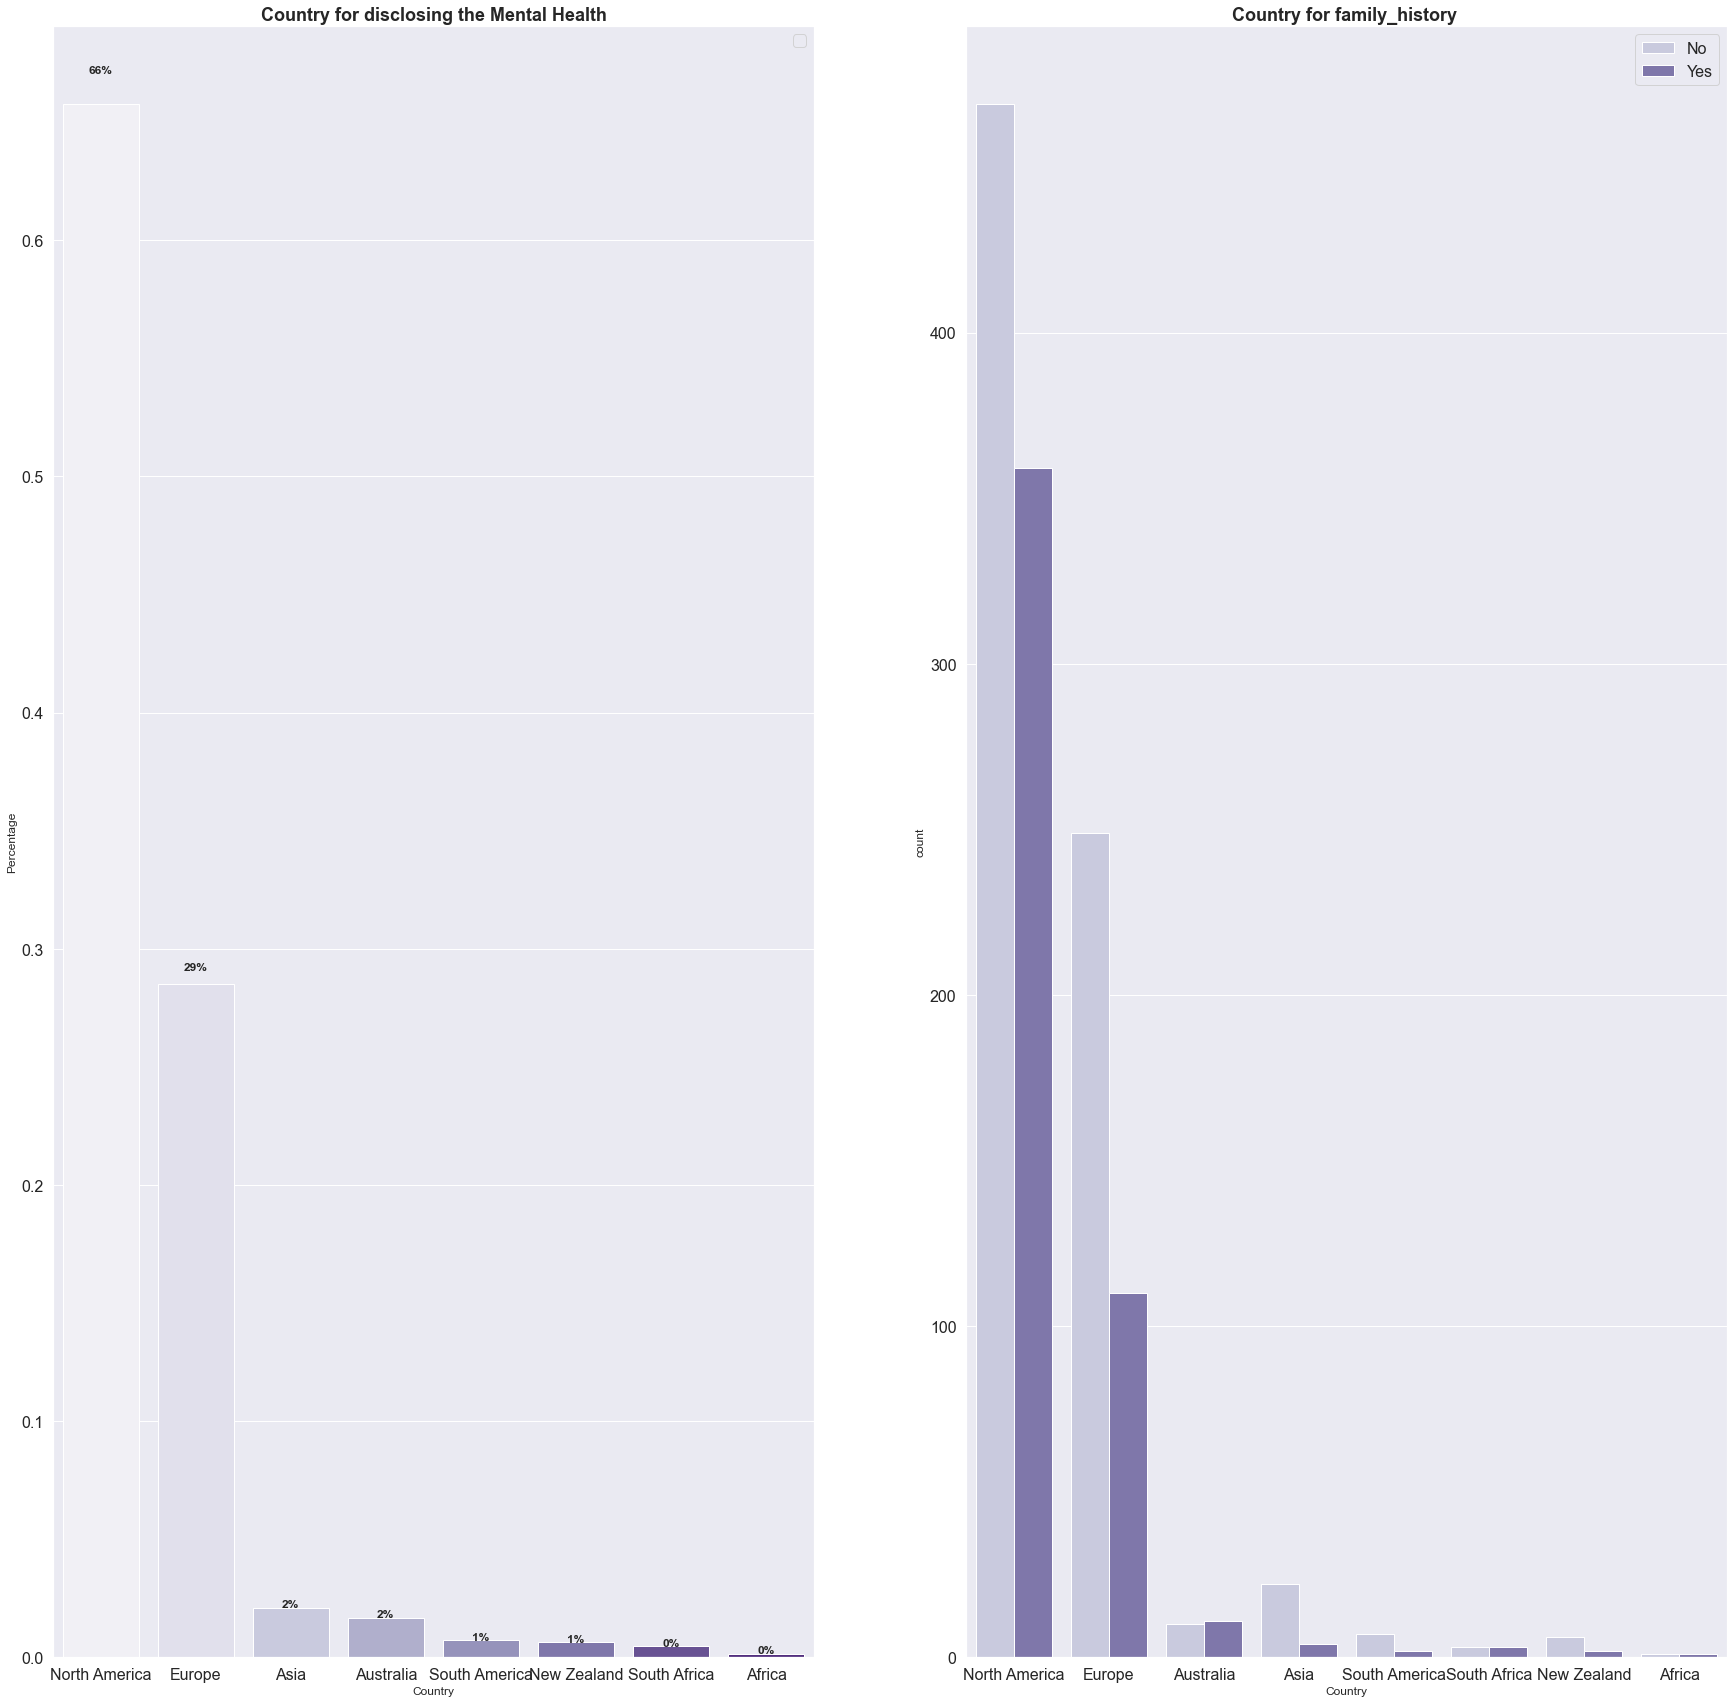

In [65]:
plt.figure(figsize=(30,30))
plt.subplot(1,2,1)
eda_percentage = data['Country'].value_counts(normalize = True).rename_axis('Country').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'Country', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Country for disclosing the Mental Health', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(data['Country'], hue = data['family_history'], palette='Purples')
    
plt.title('Country for family_history ', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

In North America, there are more people who do not have a history of mental illness in their family than those who do
 In Europe, it is the same as in North America, but with the difference that the number of people who do not have a history of mental illness in their family is about twice as many as those who have a history of illness in their family.
In Australia, it is completely opposite to North America and Europe, and the number of people who have a history in their family is more than those who don't
In Asia, South America and New Zealand, the number of people who do not have a history in their family is more than those who have a history
In Africa, this number is equal





No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


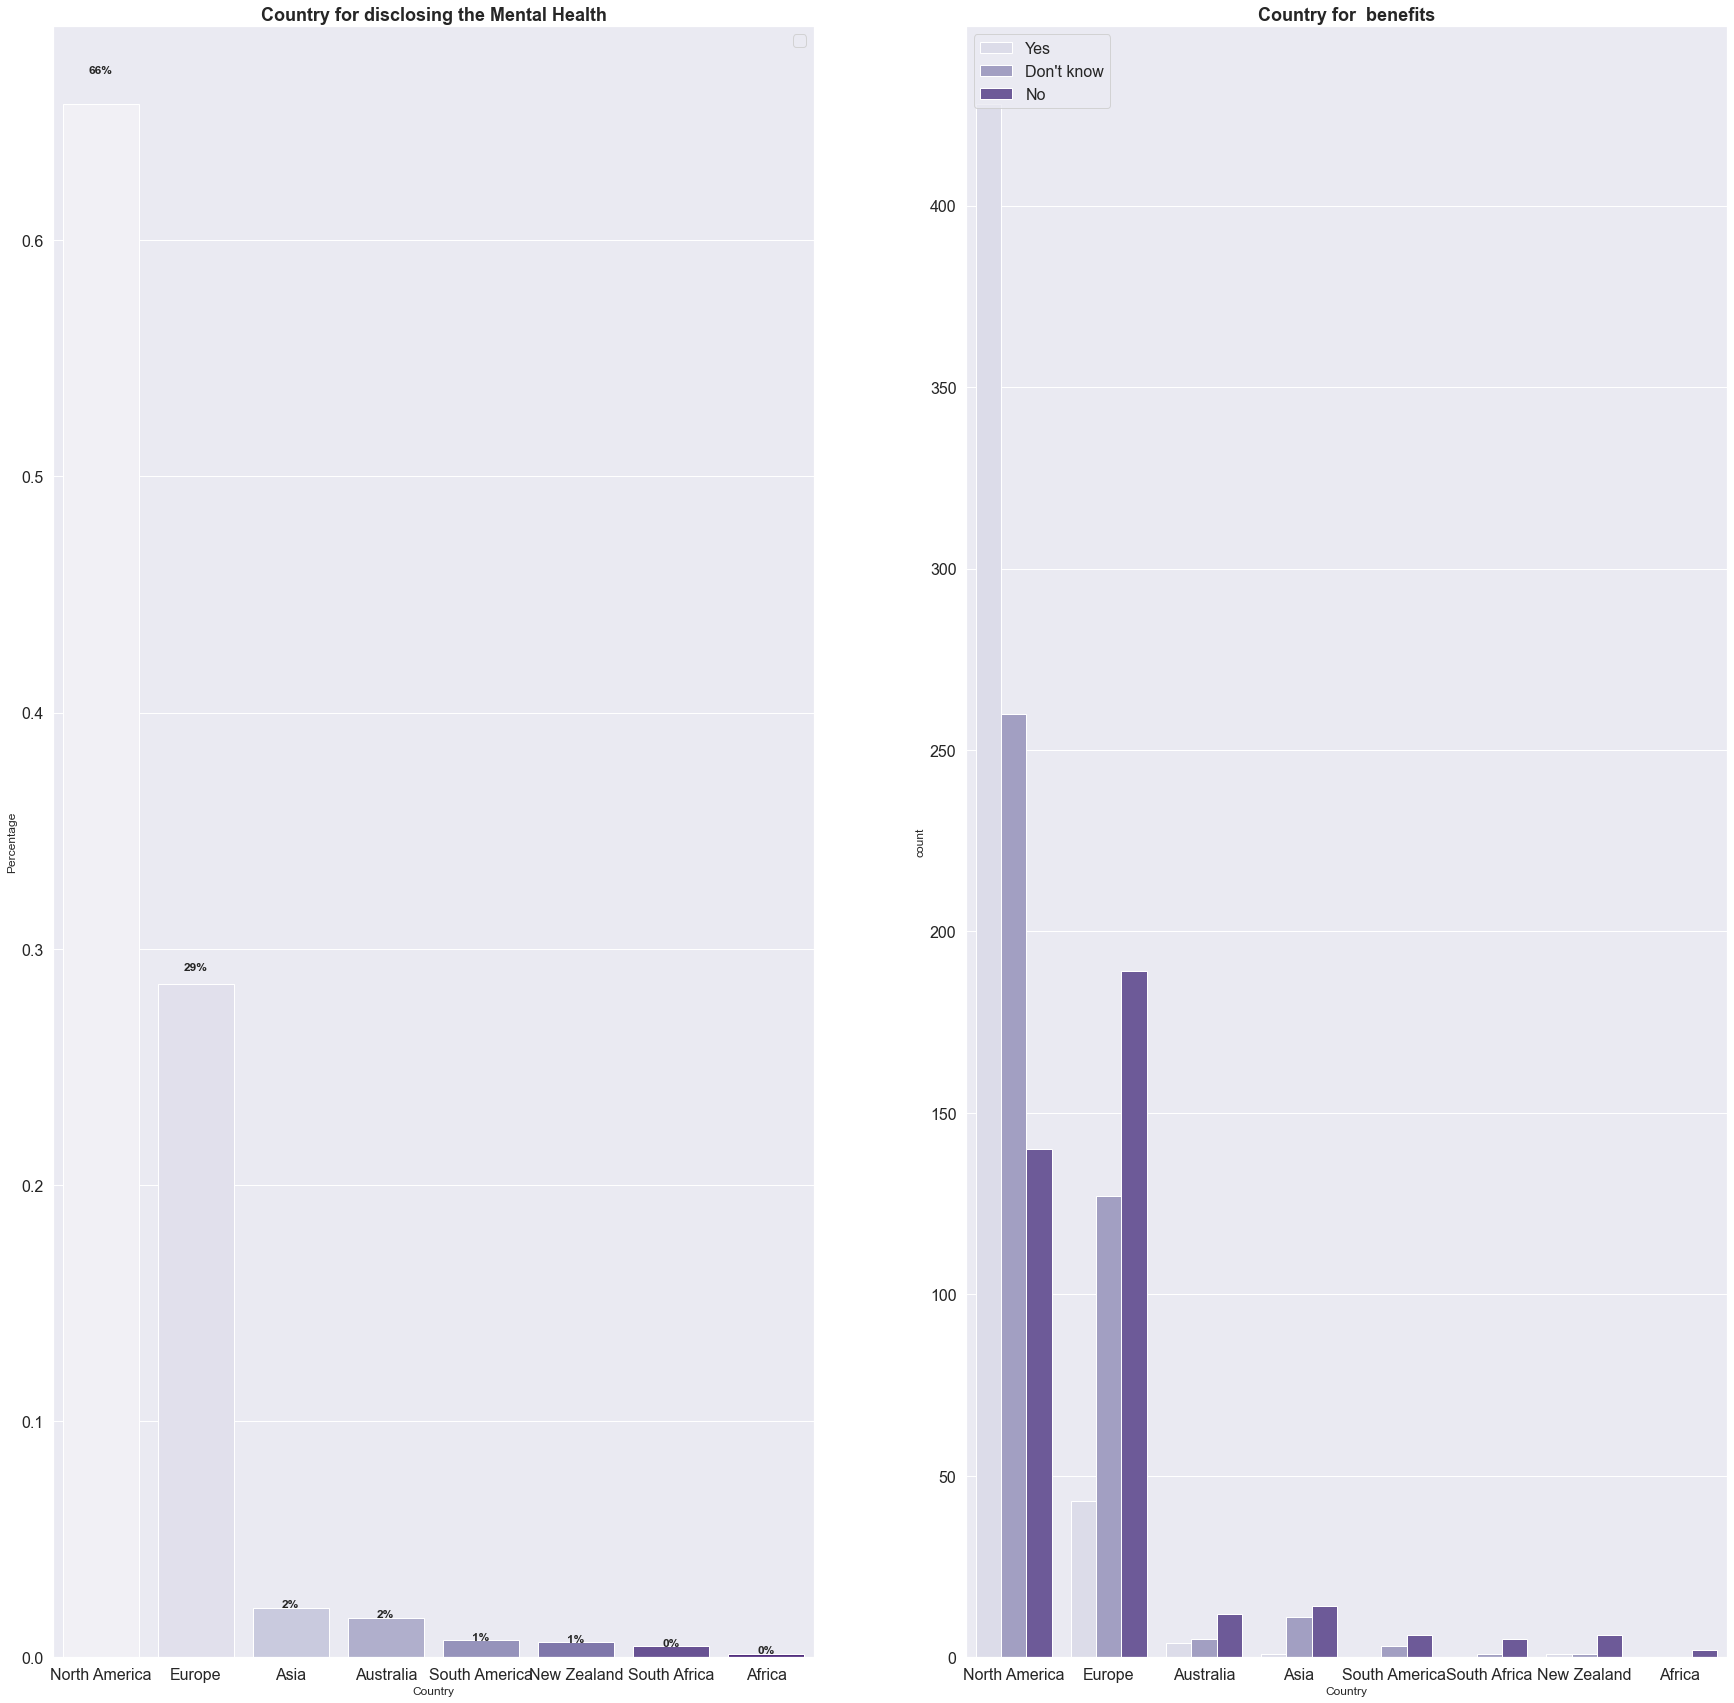

In [67]:
plt.figure(figsize=(30,30))
plt.subplot(1,2,1)
eda_percentage = data['Country'].value_counts(normalize = True).rename_axis('Country').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'Country', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Country for disclosing the Mental Health', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(data['Country'], hue = data['benefits'], palette='Purples')
    
plt.title('Country for  benefits', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

In North America, the number of employers who provide mental health benefits to their employees is more than those who do not, and it is very interesting that in the rest of the world this is completely the opposite, and the number of employers who provide mental health benefits to their employees is less than those who do not. do not believe

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


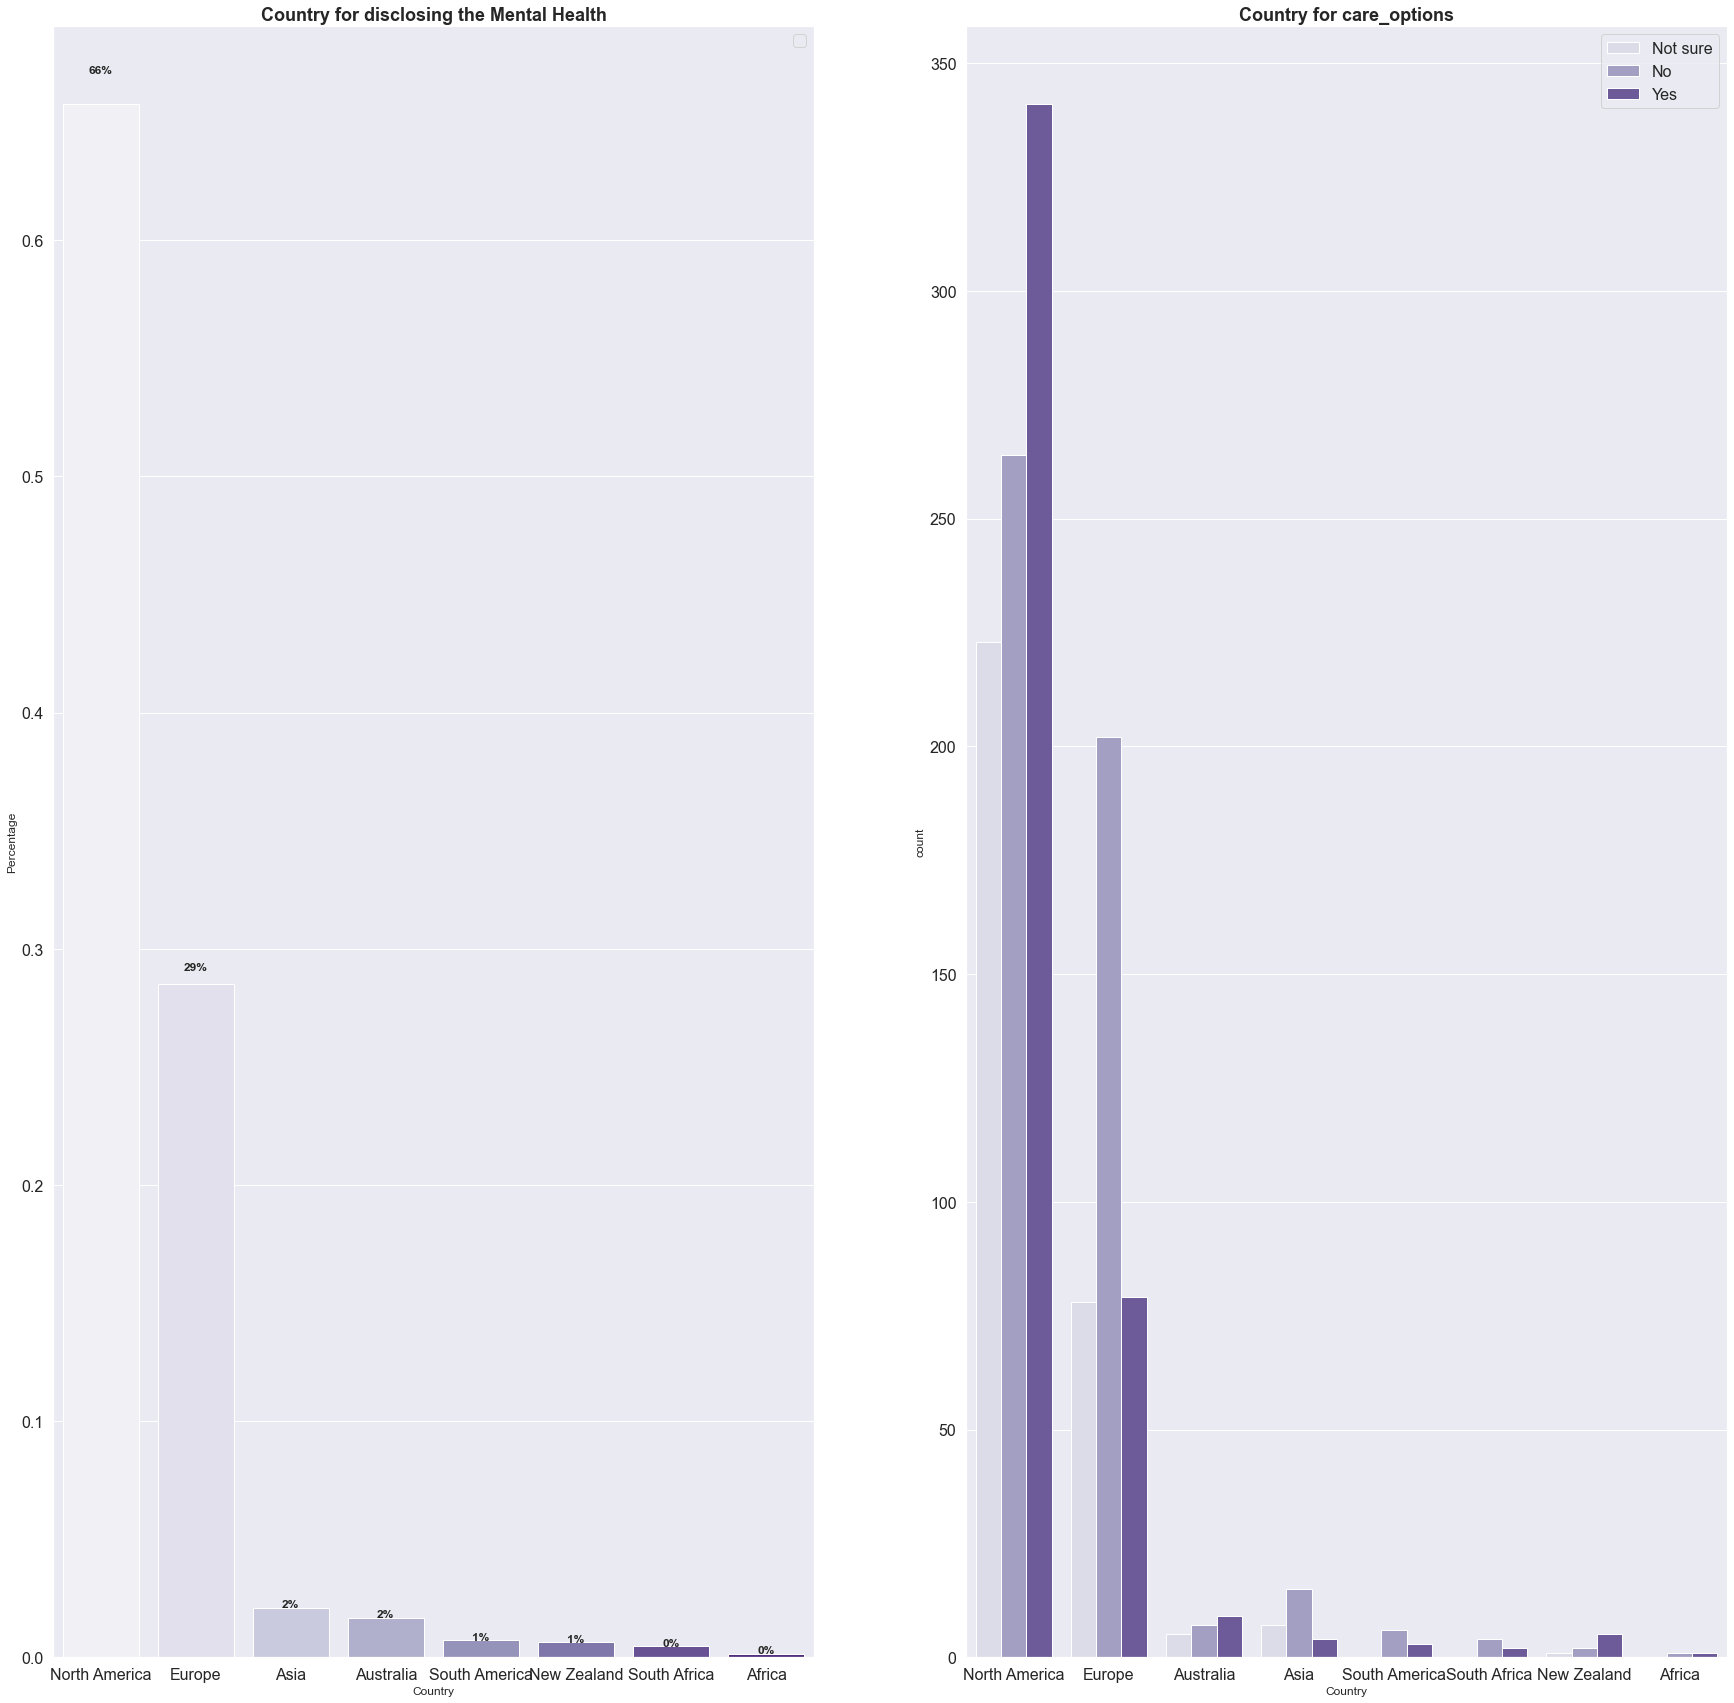

In [68]:
plt.figure(figsize=(30,30))
plt.subplot(1,2,1)
eda_percentage = data['Country'].value_counts(normalize = True).rename_axis('Country').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'Country', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Country for disclosing the Mental Health', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(data['Country'], hue = data['care_options'], palette='Purples')
    
plt.title('Country for care_options', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

 In North America, more employees are aware of mental health care options offered by their employers than those who are not.
In Europe, there are more people who are not informed than those who are informed
In Australia and New Zealand, the number of those who are informed is more than those who are not informed
In Asia, South Africa and South America, like Europe, the number of people who are not informed is more than those who are informed

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


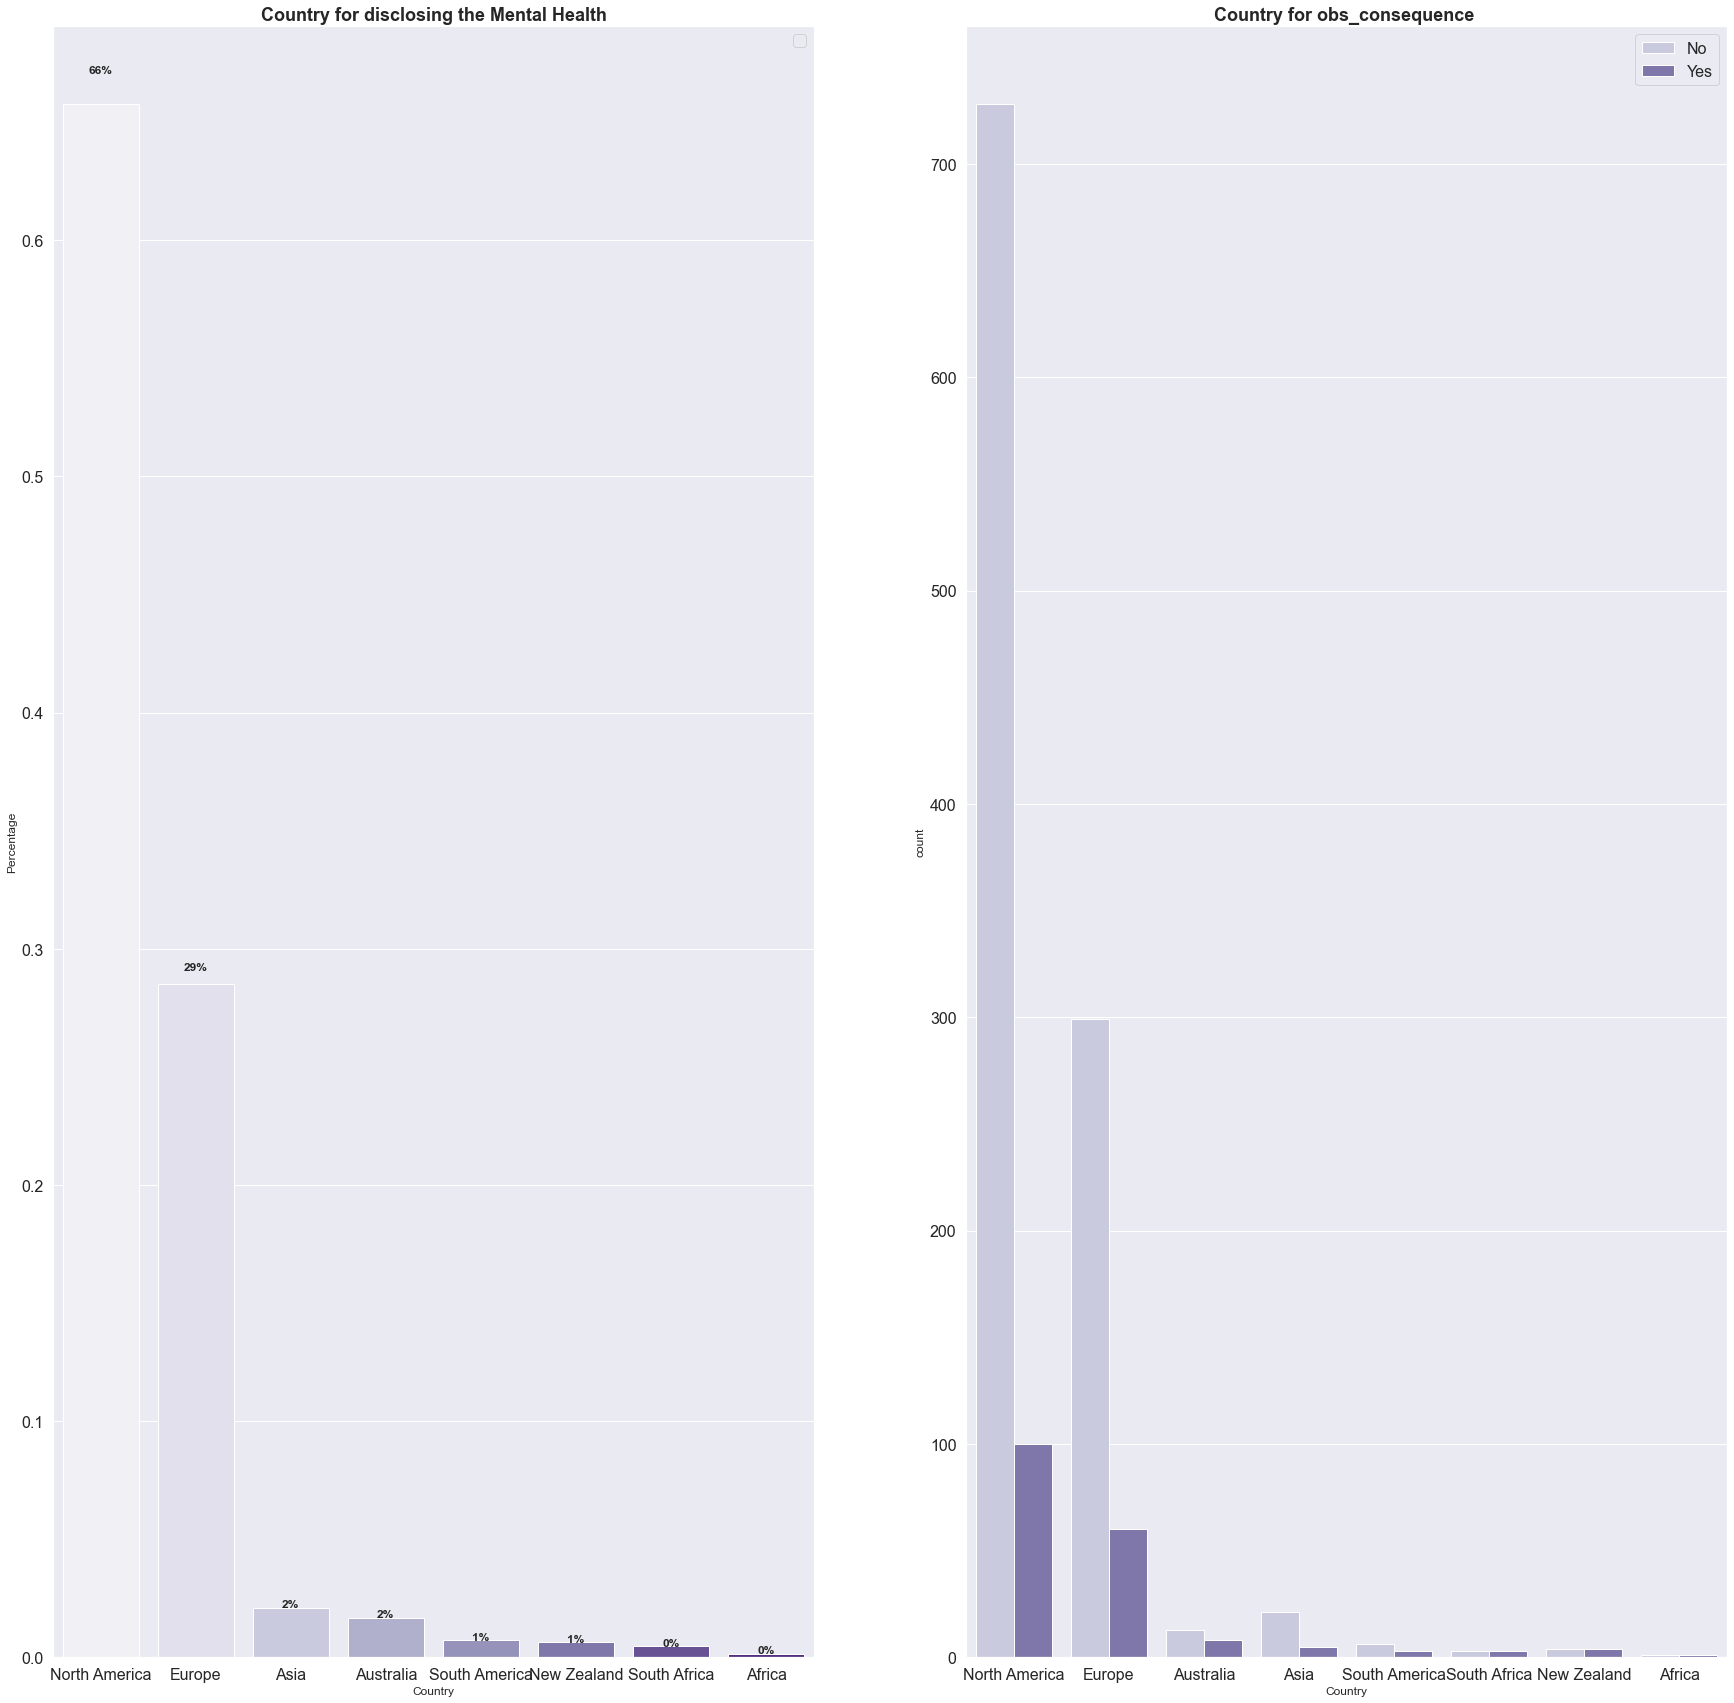

In [69]:
plt.figure(figsize=(30,30))
plt.subplot(1,2,1)
eda_percentage = data['Country'].value_counts(normalize = True).rename_axis('Country').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'Country', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Country for disclosing the Mental Health', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(data['Country'], hue = data['obs_consequence'], palette='Purples')
    
plt.title('Country for obs_consequence ', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

Globally, the number of employees who have heard or observed negative consequences for co-workers with mental health conditions at work is lower than those who have.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


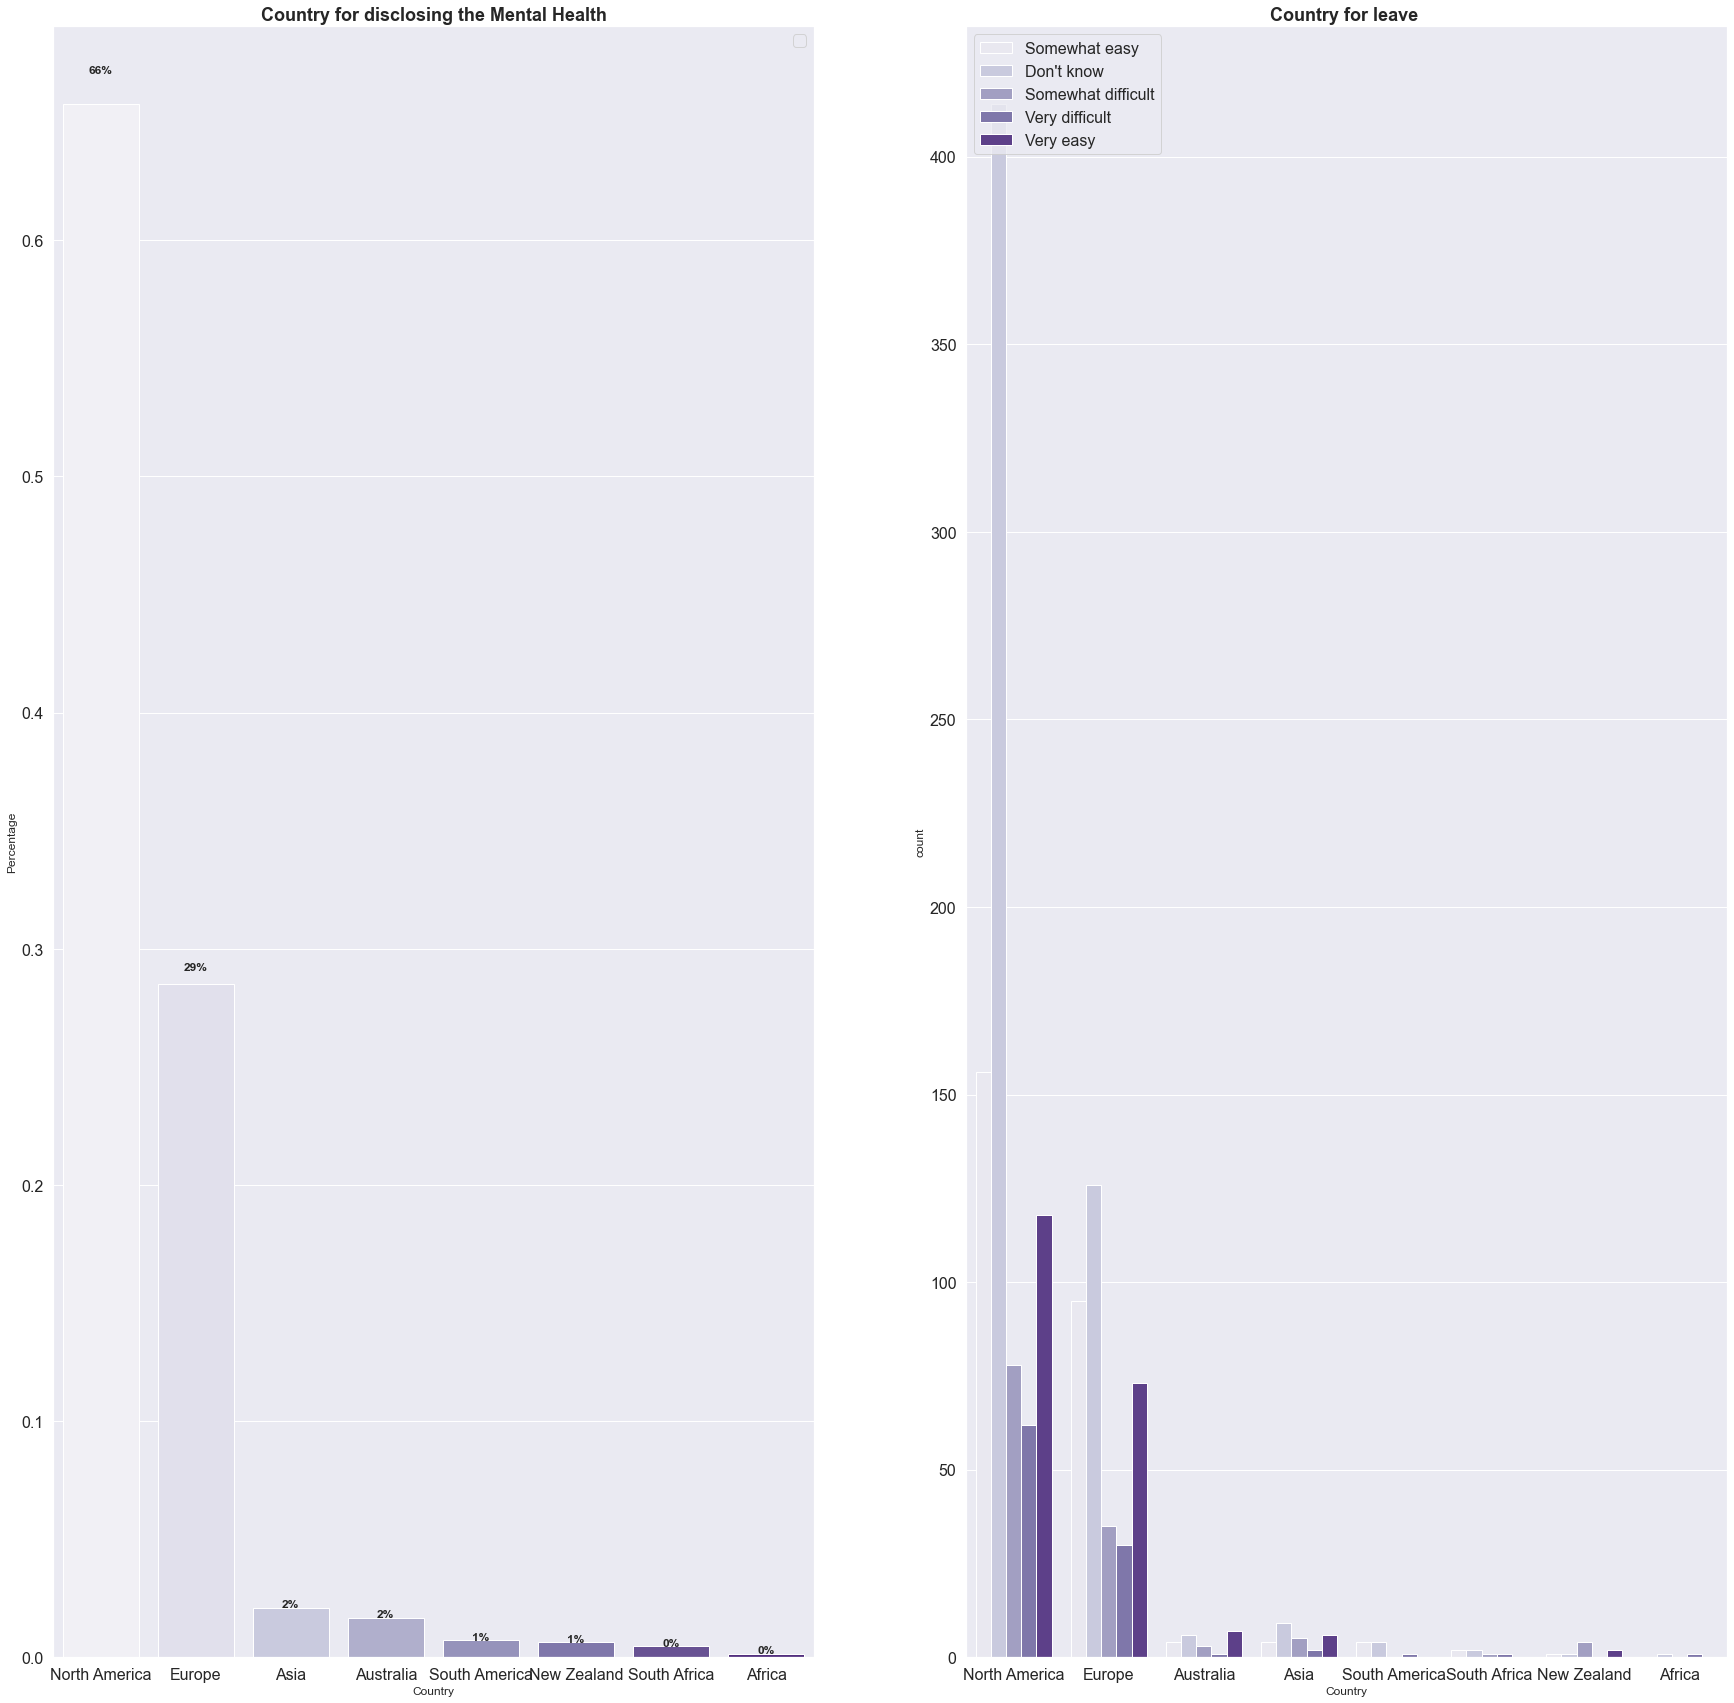

In [70]:
plt.figure(figsize=(30,30))
plt.subplot(1,2,1)
eda_percentage = data['Country'].value_counts(normalize = True).rename_axis('Country').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'Country', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Country for disclosing the Mental Health', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(data['Country'], hue = data['leave'], palette='Purples')
    
plt.title('Country for leave ', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

In North America, Europe, and Australia, the number of people who take time off easily is more than those who take time off hard.
In Asia, the number of people who take it easy is more than the number of people who sometimes take it easy

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


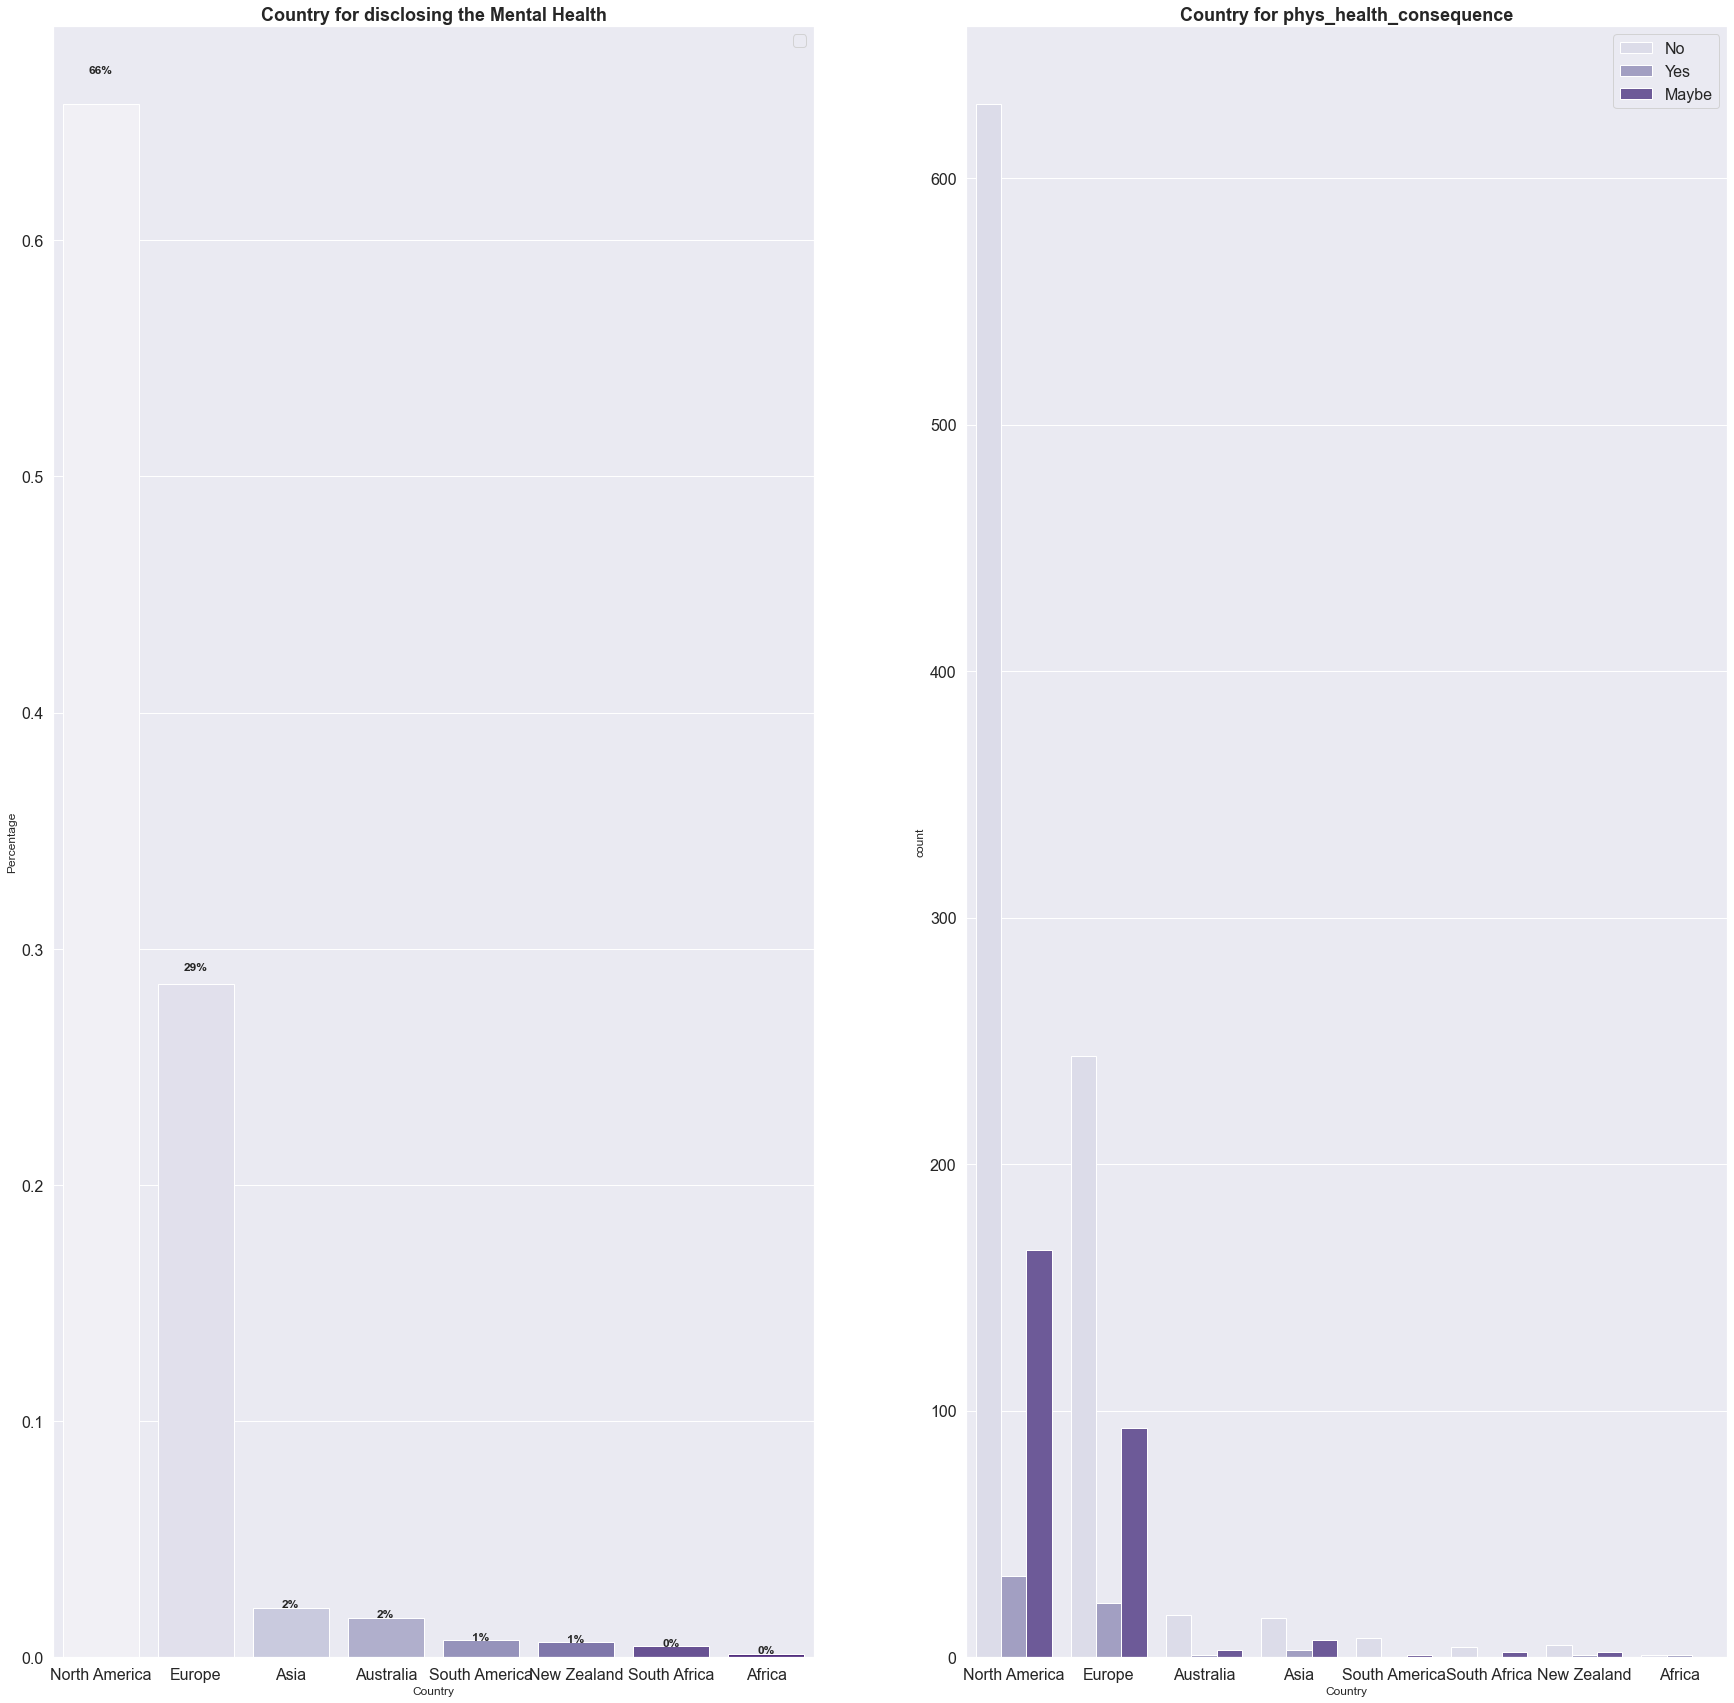

In [71]:
plt.figure(figsize=(30,30))
plt.subplot(1,2,1)
eda_percentage = data['Country'].value_counts(normalize = True).rename_axis('Country').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'Country', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Country for disclosing the Mental Health', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(data['Country'], hue = data['phys_health_consequence'], palette='Purples')
    
plt.title('Country for phys_health_consequence', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

In general, in the world, the number of those who do not raise their physical problems in a job interview is higher than those who raise them

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


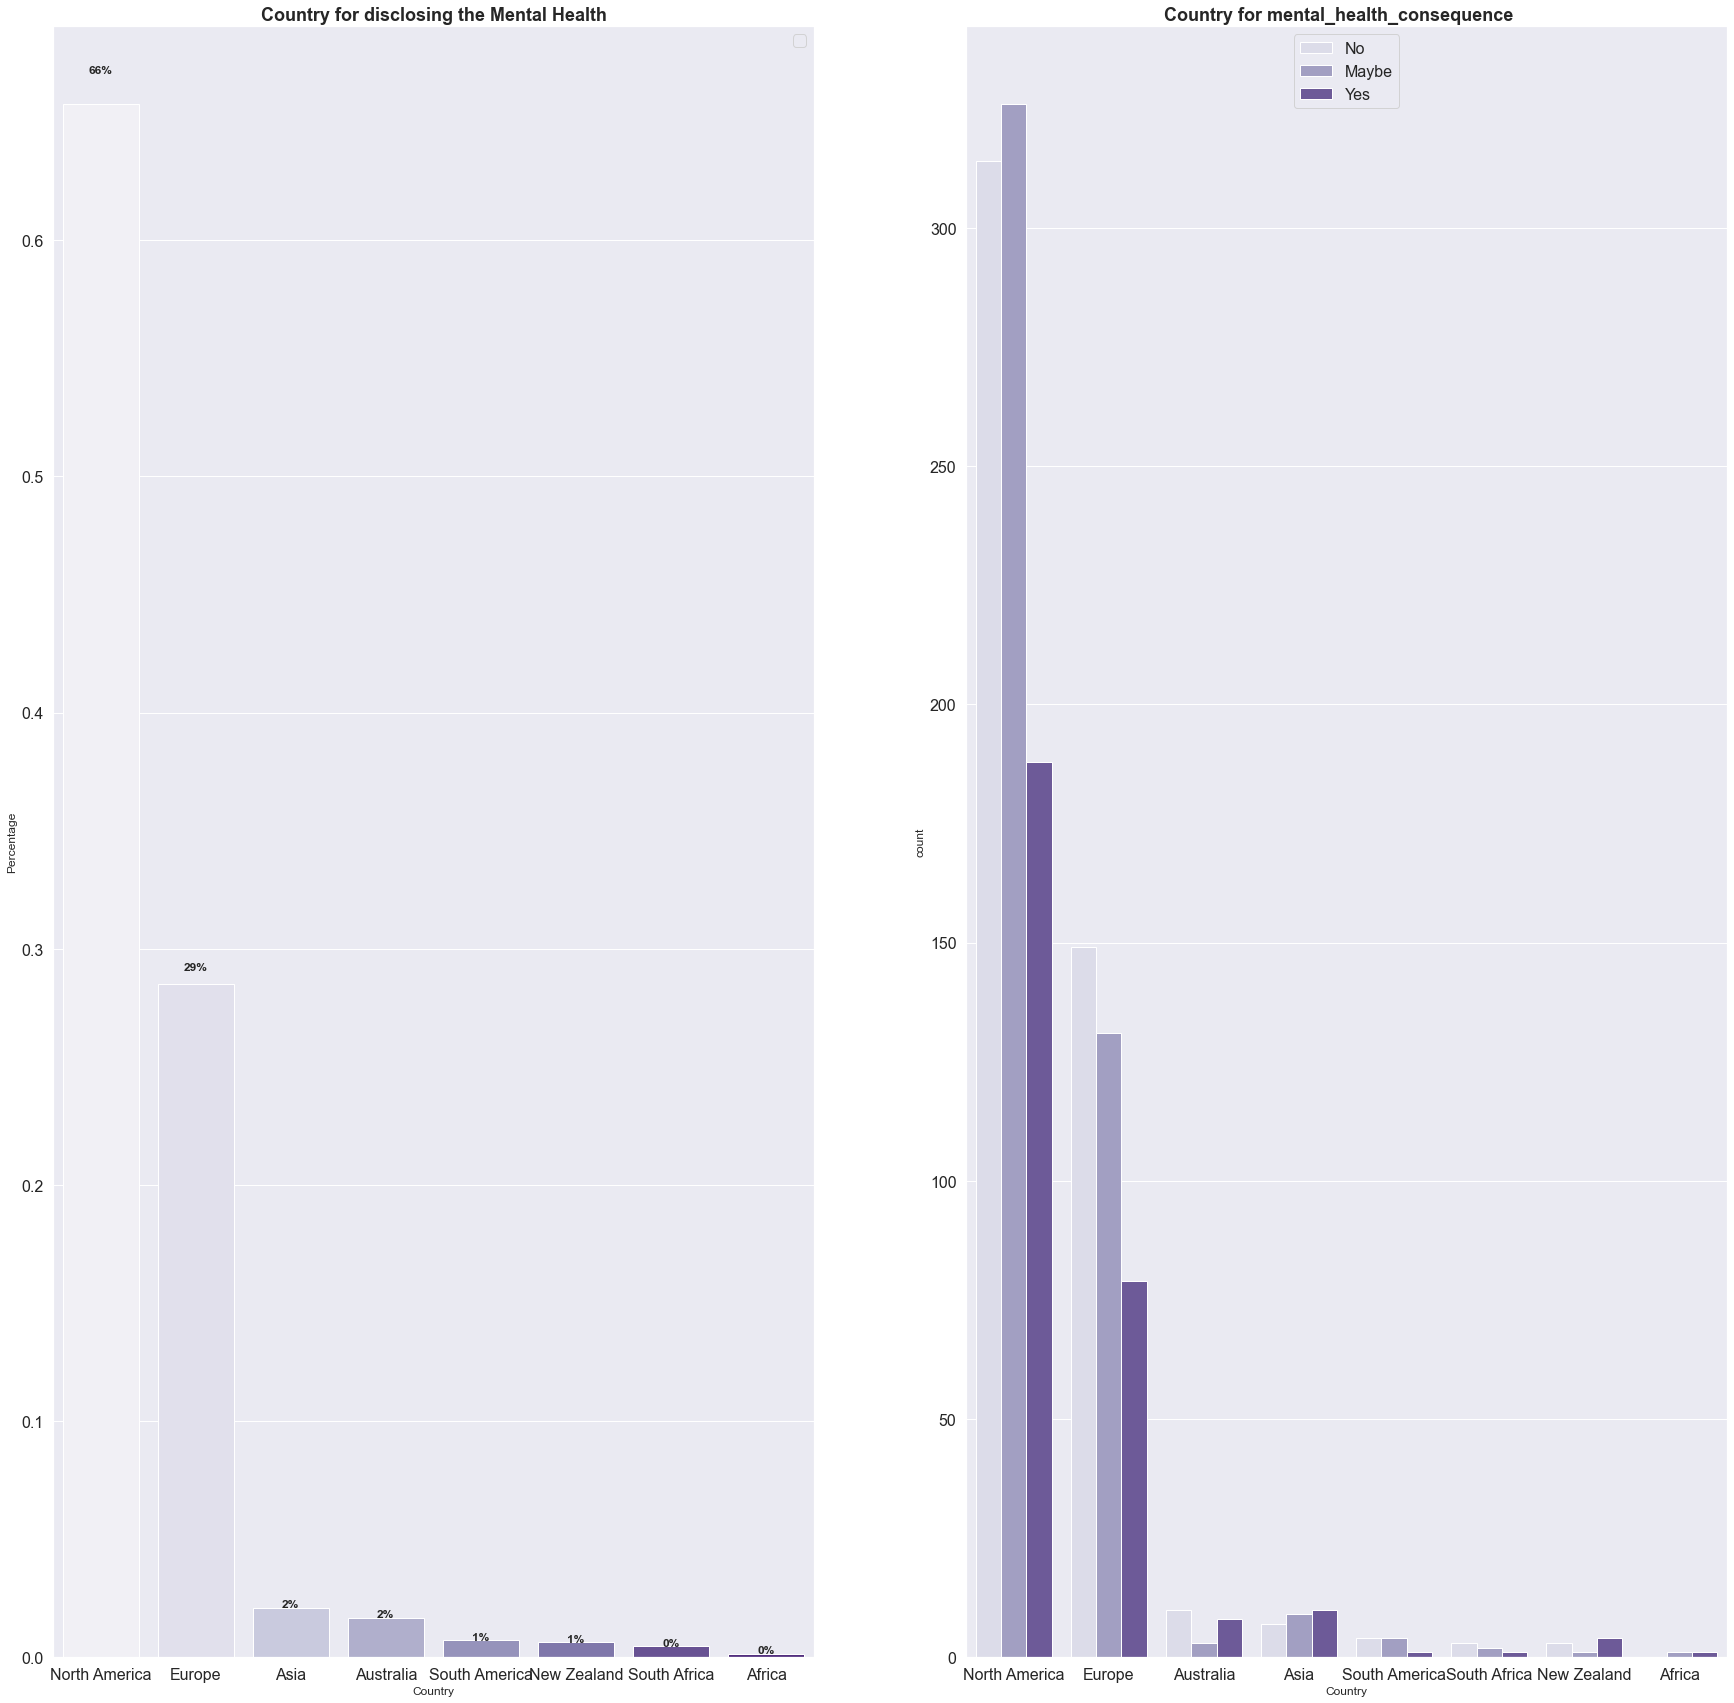

In [72]:
plt.figure(figsize=(30,30))
plt.subplot(1,2,1)
eda_percentage = data['Country'].value_counts(normalize = True).rename_axis('Country').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'Country', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Country for disclosing the Mental Health', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(data['Country'], hue = data['mental_health_consequence'], palette='Purples')
    
plt.title('Country for mental_health_consequence   ', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

In North America, Europe, Australia, and South Africa, there are more people who do not mention their mental health problems in their job interviews than those who do.
But in Asia, the number of those who raise their mental problems is more than those who don't

In [50]:
data.isna().sum()care_options

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

#In North America, those who are treated are more than those who are not treated.
In Europe, this is completely the opposite
In Australia it is like North America
It is like Europe in Asia
In South America it is like Europe

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


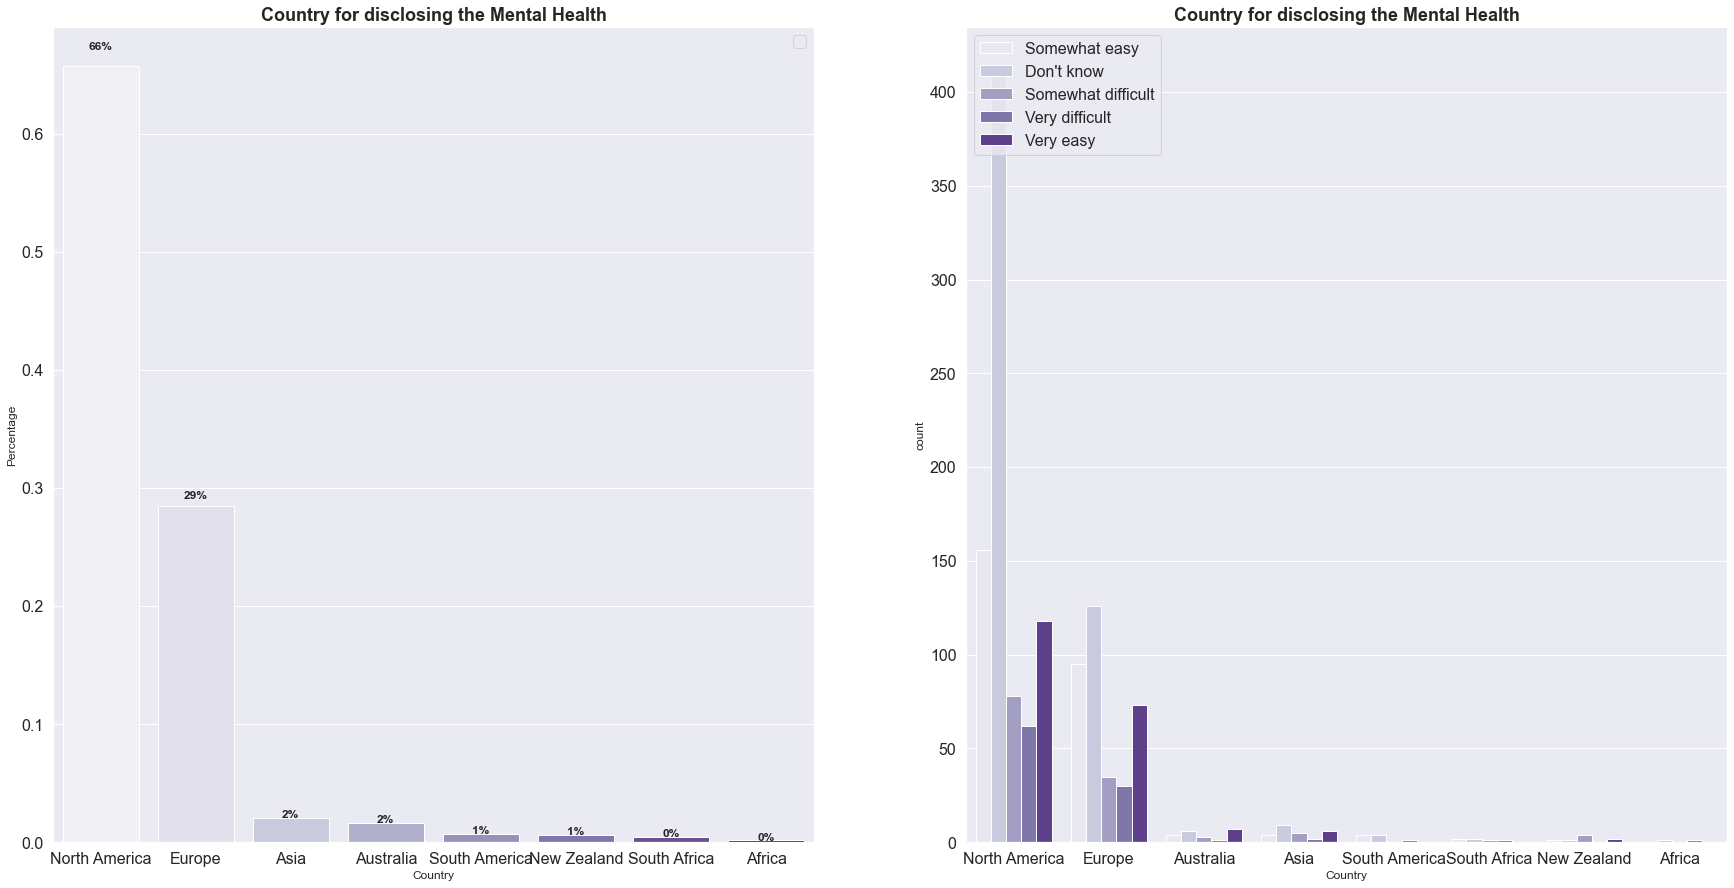

In [41]:
plt.figure(figsize=(30,15))
plt.subplot(1,2,1)
eda_percentage = data['Country'].value_counts(normalize = True).rename_axis('Country').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'Country', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Country for disclosing the Mental Health', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(data['Country'], hue = data['leave'], palette='Purples')
    
plt.title('Country for disclosing the Mental Health', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


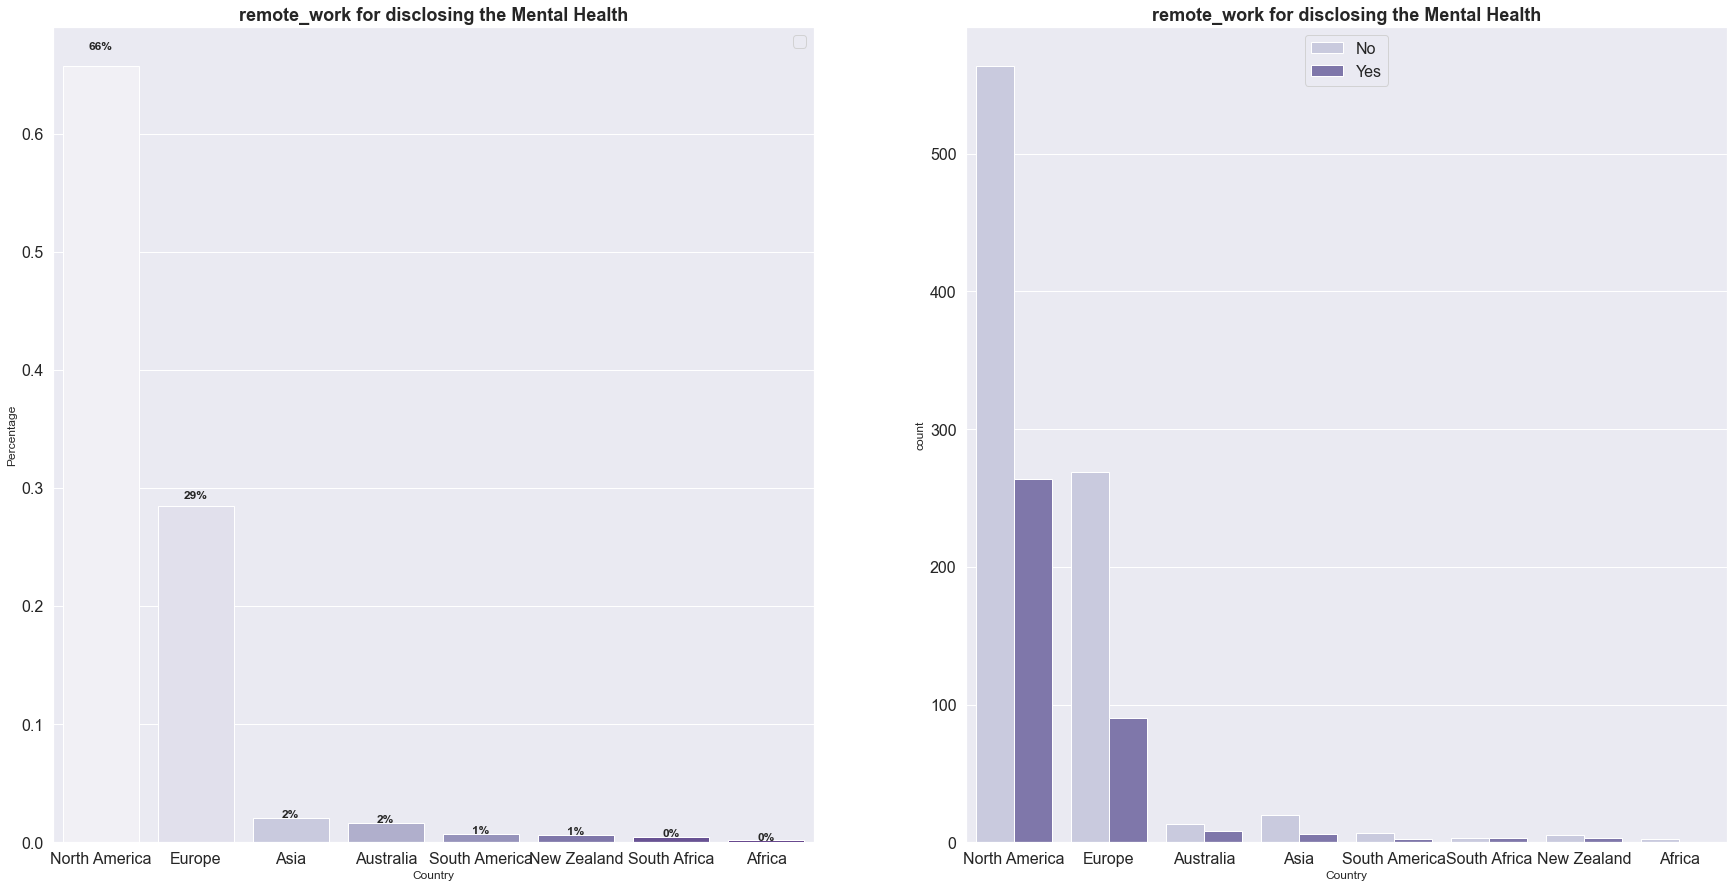

In [43]:

plt.figure(figsize=(30,15))
plt.subplot(1,2,1)
eda_percentage = data['Country'].value_counts(normalize = True).rename_axis('Country').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'Country', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('remote_work for disclosing the Mental Health', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(data['Country'], hue = data['remote_work'], palette='Purples')
    
plt.title('remote_work for disclosing the Mental Health', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

<h1 style = "font-family: Comic Sans MS;background-color:#D7BDE2	"> Data Preparation </h1>


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1254 entries, 0 to 1258
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1254 non-null   int64 
 1   Gender                     1254 non-null   object
 2   self_employed              1236 non-null   object
 3   family_history             1254 non-null   object
 4   treatment                  1254 non-null   object
 5   work_interfere             991 non-null    object
 6   no_employees               1254 non-null   object
 7   remote_work                1254 non-null   object
 8   tech_company               1254 non-null   object
 9   benefits                   1254 non-null   object
 10  care_options               1254 non-null   object
 11  wellness_program           1254 non-null   object
 12  seek_help                  1254 non-null   object
 13  anonymity                  1254 non-null   object
 14  leave   

**Note:** 
We have only two columns left that contain null values - **work_interfere** and **self_employed**. Let us try to fill these null values and make our data ready for further processing.

* Since, there are only 20% of work_interfere so let's change NaN to "Don't know.
* There are only 1.4% of self employed so let's change NaN to NOT self_employed

We will be replacing the blank values with **'Don't Know'** for work_interfere category and for the 

In [31]:
data['work_interfere'] = data['work_interfere'].fillna('Don\'t know' )
print(data['work_interfere'].unique())

['Often' 'Rarely' 'Never' 'Sometimes' "Don't know"]


In [32]:
data['self_employed'] = data['self_employed'].fillna('No')
print(data['self_employed'].unique())

['No' 'Yes']


In [33]:
data.isnull().sum()

Age                          0
Gender                       0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

In [34]:
data.columns

Index(['Age', 'Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

In [35]:
list_col=['Age', 'Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence']

for col in list_col: 
    print('{} :{} ' . format(col.upper(),data[col].unique()))
    

AGE :[37 44 32 31 33 35 39 42 23 29 36 27 46 41 34 30 40 38 50 24 18 28 26 22
 19 25 45 21 43 56 60 54 55 48 20 57 58 47 62 51 65 49  5 53 61  8 11 72] 
GENDER :['Female' 'Male' 'Other'] 
SELF_EMPLOYED :['No' 'Yes'] 
FAMILY_HISTORY :['No' 'Yes'] 
TREATMENT :['Yes' 'No'] 
WORK_INTERFERE :['Often' 'Rarely' 'Never' 'Sometimes' "Don't know"] 
NO_EMPLOYEES :['6-25' 'More than 1000' '26-100' '100-500' '1-5' '500-1000'] 
REMOTE_WORK :['No' 'Yes'] 
TECH_COMPANY :['Yes' 'No'] 
BENEFITS :['Yes' "Don't know" 'No'] 
CARE_OPTIONS :['Not sure' 'No' 'Yes'] 
WELLNESS_PROGRAM :['No' "Don't know" 'Yes'] 
SEEK_HELP :['Yes' "Don't know" 'No'] 
ANONYMITY :['Yes' "Don't know" 'No'] 
LEAVE :['Somewhat easy' "Don't know" 'Somewhat difficult' 'Very difficult'
 'Very easy'] 
MENTAL_HEALTH_CONSEQUENCE :['No' 'Maybe' 'Yes'] 
PHYS_HEALTH_CONSEQUENCE :['No' 'Yes' 'Maybe'] 
COWORKERS :['Some of them' 'No' 'Yes'] 
SUPERVISOR :['Yes' 'No' 'Some of them'] 
MENTAL_HEALTH_INTERVIEW :['No' 'Yes' 'Maybe'] 
PHYS_HEALTH_INTE

<h3 style = "font-family: Comic Sans MS;background-color:#D7BDE2	"> Inference: </h3>

* We can clearly see that all the columns except the '**Age**', consist of object type values.
* We also notice that most of the columns consist of values '**Yes**', '**No**' , '**Maybe**' etc. which can be easily encoded. 
> So the next step that we would perform will be encoding!

In [36]:
# Label Encoding the categorical variables

from sklearn.preprocessing import LabelEncoder
object_cols = ['Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence']
label_encoder = LabelEncoder()
for col in object_cols:
    label_encoder.fit(data[col])
    data[col] = label_encoder.transform(data[col])

In [37]:
data['treatment'].value_counts()

1    633
0    621
Name: treatment, dtype: int64

<h3 style = "font-family: Comic Sans MS;background-color:#D7BDE2	"> Inference: </h3>

* We can see that the target column, i.e **'treatment'** has almost equal values for both the categories. This means that we do not have to perform undersampling or oversampling.
* Now let us make a heatmap and try to understand the correlation of various features with the target variable.

<AxesSubplot:>

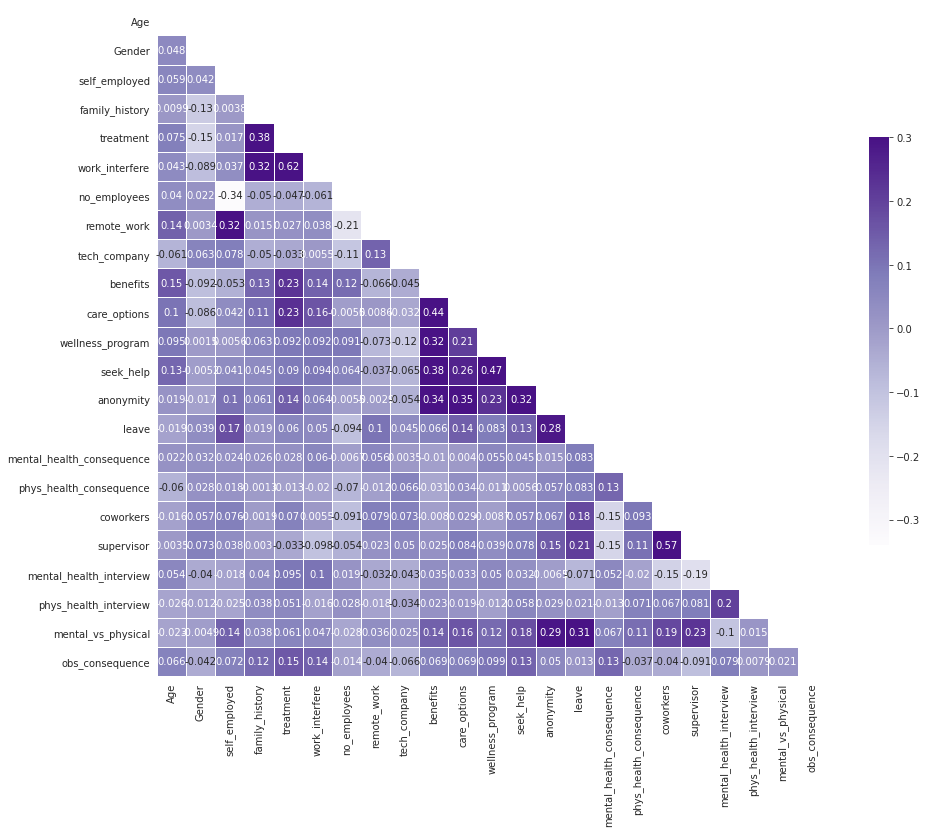

In [38]:
# Compute the correlation matrix
corr = data.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 15))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='Purples', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

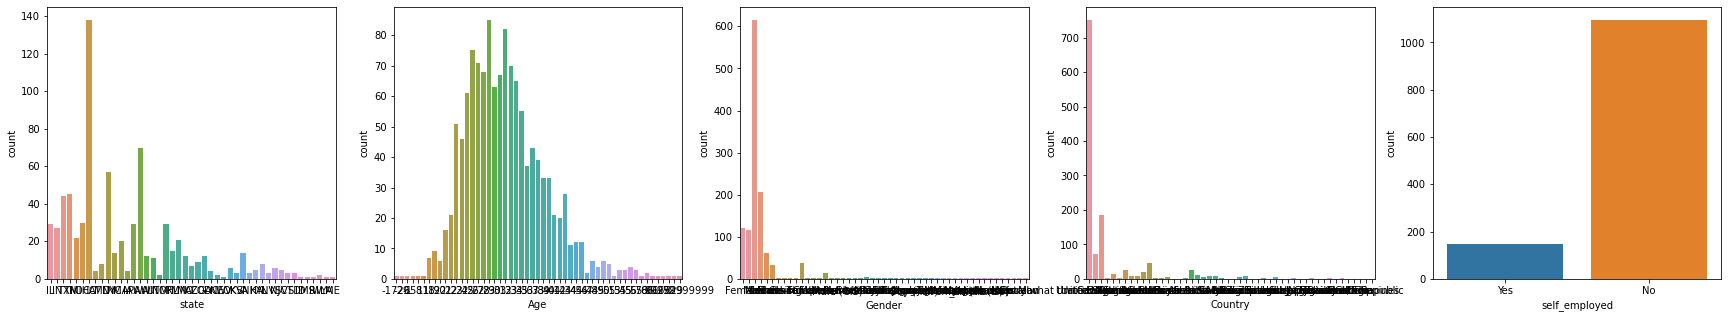

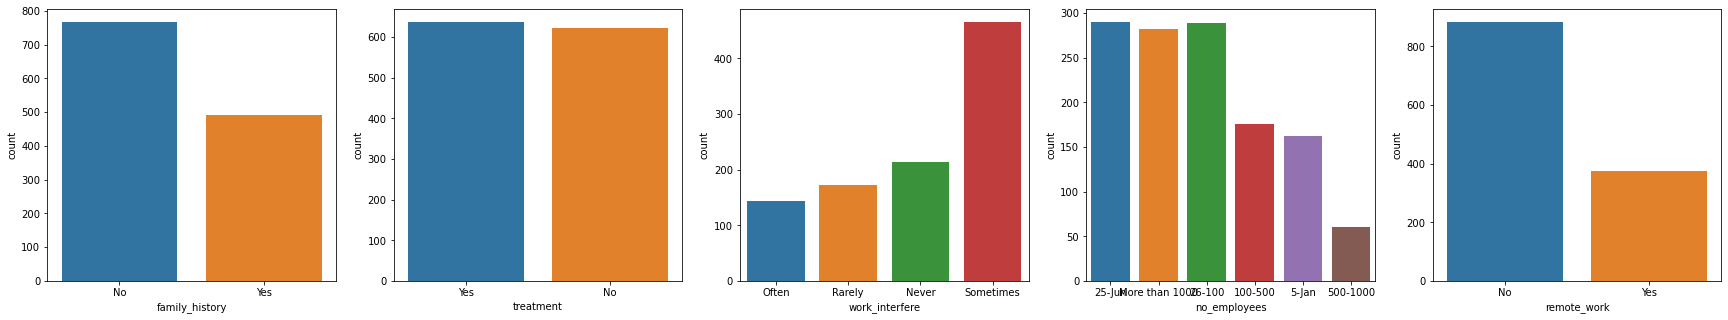

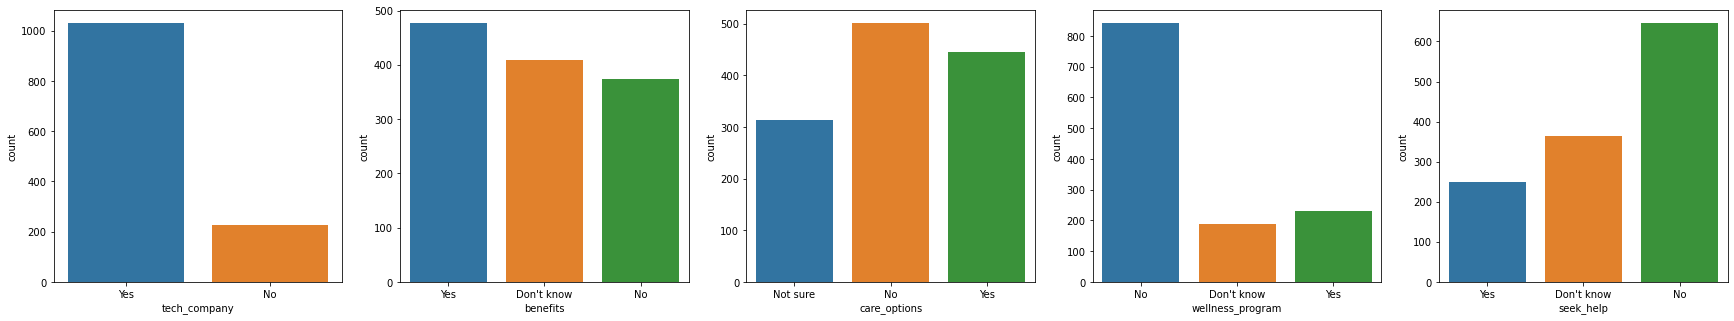

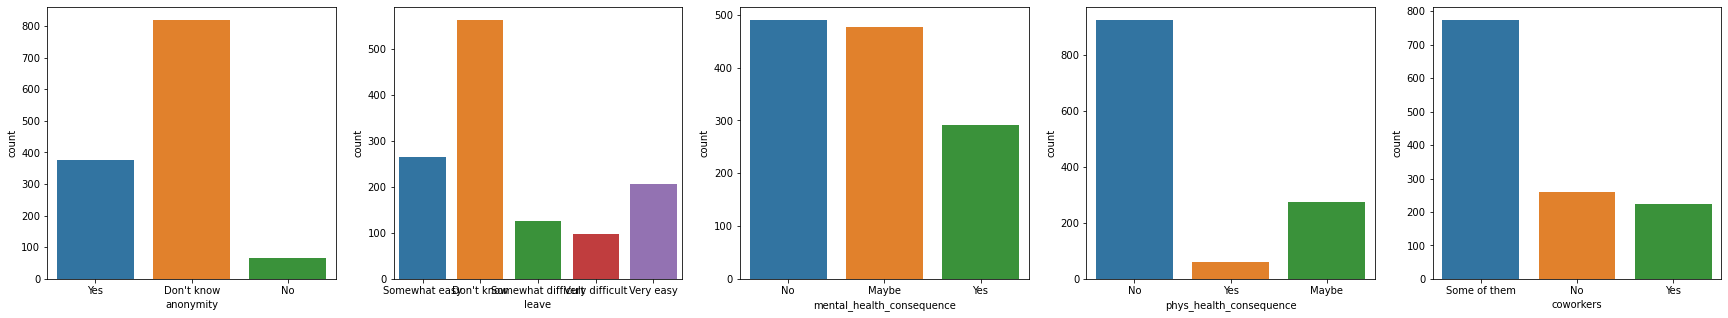

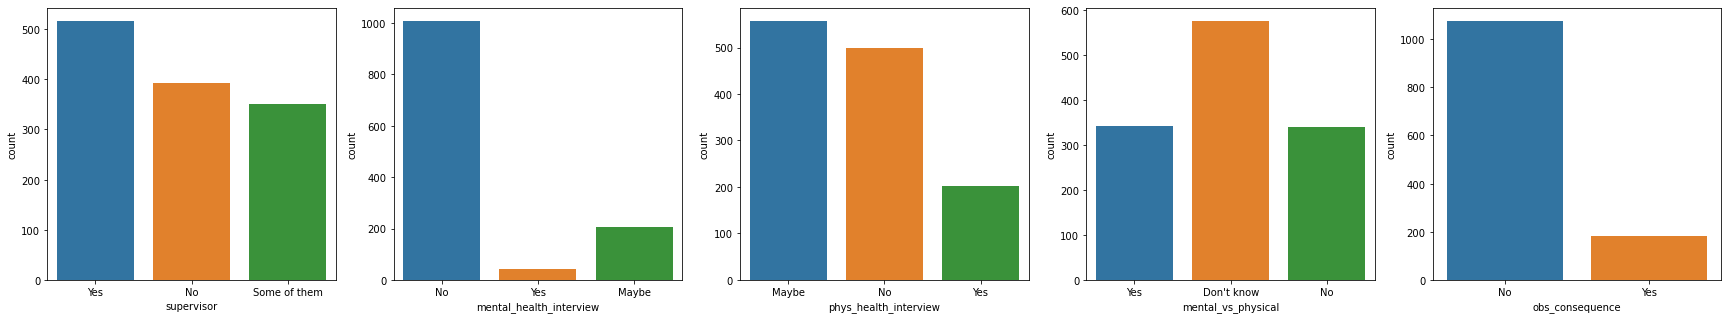

In [5]:
import seaborn as sns
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
categorical=categorical=[ 'state','Age','Gender','Country','self_employed','family_history','treatment','work_interfere','no_employees','remote_work','tech_company','benefits','care_options','wellness_program','seek_help','anonymity','leave','mental_health_consequence','phys_health_consequence','coworkers','supervisor','mental_health_interview','phys_health_interview','mental_vs_physical','obs_consequence'
 ]
i=0
while i<25:
    fig=plt.figure(figsize=[30,5])
    plt.subplot(1,5,1)
    sns.countplot(x=categorical[i],data=data)
    i+=1
    
    plt.subplot(1,5,2)
    sns.countplot(x=categorical[i],data=data)
    i+=1
    plt.subplot(1,5,3)
    sns.countplot(x=categorical[i],data=data)
    i+=1
    plt.subplot(1,5,4)
    sns.countplot(x=categorical[i],data=data)
    i+=1
    plt.subplot(1,5,5)
    sns.countplot(x=categorical[i],data=data)
    i+=1
    
    
    plt.show

# These PLOTS are generally drawn to find noise